# Advanced Regression Assignment

## Table Of Contents

- [Problem Statement](#problem-statement)
- [Business Goal](#business-goal)
- [Steps Involved](#steps-involved)
- [Reading and Understanding the Data](#reading-and-understanding-data)
  - [Data Dictionary](#data-dictionary)
  - [Import All the required libraries](#import-all-the-required-librarires-classes-and-methods)
- [Univariate Analysis](#univariate-analysis)
- [Bivariate Analysis](#bivariate-analysis)
- [Data Preprocessing](#data-prepocessing)
- [Feature Engineering](#feature-engineering)
- [Ridge Regression](#model-1-ridge-regression)
- [Lasso Regression](#model-2-lasso)
- [Inferences](#inferences)

## Problem Statement

>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

>The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

*Note: Also, determine the optimal value of lambda for ridge and lasso regression.*

## Business Goal

>You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps Involved

- Reading, Understanding and visualizing the data.
- Preparing the data for modelling(train-test split, rescaling etc.)
- Training the model.
- Verifying the model on the train set.
- Predictions and analysis on the test set.

## Reading And Understanding Data

### Data Dictionary

In [302]:
data_description = open('./Data/data_description.txt', 'r')
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Import all the required librarires, classes and methods.

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#### Suppress Library Warnings

In [304]:
import warnings

warnings.filterwarnings('ignore')

In [305]:
## Set display limits
pd.set_option('display.max_columns', None)

#### Read dataset and understand kind of data it's storing

In [306]:
housing_info = pd.read_csv('./Data/train.csv', keep_default_na=False)
housing_info.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

**Total Records: 1460**
**Cell Per Record: 81**

In [307]:
housing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

**Check the dimensions**

In [308]:
print("Number of Rows = ", housing_info.shape[0])
print("Number of Columns = ", housing_info.shape[1])

Number of Rows =  1460
Number of Columns =  81


**Replace all the Na with none**

In [309]:
housing_info[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = housing_info[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")

In [310]:
housing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

##### Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the types of following columns have to be changed:

- Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
- Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [311]:
housing_info[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_info[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [312]:
housing_info['LotFrontage'] = pd.to_numeric(housing_info['LotFrontage'], errors='coerce')
housing_info['MasVnrArea'] = pd.to_numeric(housing_info['MasVnrArea'], errors='coerce')

In [313]:
housing_info.describe()

Id  LotFrontage    LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count 1,460.00     1,201.00   1,460.00   1,460.00      1,460.00    1,452.00   
mean    730.50        70.05  10,516.83   1,971.27      1,984.87      103.69   
std     421.61        24.28   9,981.26      30.20         20.65      181.07   
min       1.00        21.00   1,300.00   1,872.00      1,950.00        0.00   
25%     365.75        59.00   7,553.50   1,954.00      1,967.00        0.00   
50%     730.50        69.00   9,478.50   1,973.00      1,994.00        0.00   
75%   1,095.25        80.00  11,601.50   2,000.00      2,004.00      166.00   
max   1,460.00       313.00 215,245.00   2,010.00      2,010.00    1,600.00   

       BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
count    1,460.00    1,460.00   1,460.00     1,460.00  1,460.00  1,460.00   
mean       443.64       46.55     567.24     1,057.43  1,162.63    346.99   
std        456.10      161.32     441.87       438.71    386.59    436.53   
min          0.00        0.00       0.00         0.00    334.00      0.00   
25%          0.00        0.00     223.00       795.75    882.00      0.00   
50%        383.50        0.00     477.50       991.50  1,087.00      0.00   
75%        712.25        0.00     808.00     1,298.25  1,391.25    728.00   
max      5,644.00    1,474.00   2,336.00     6,110.00  4,692.00  2,065.00   

       LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
count      1,460.00   1,460.00      1,460.00      1,460.00  1,460.00   
mean           5.84   1,515.46          0.43          0.06      1.57   
std           48.62     525.48          0.52          0.24      0.55   
min            0.00     334.00          0.00          0.00      0.00   
25%            0.00   1,129.50          0.00          0.00      1.00   
50%            0.00   1,464.00          0.00          0.00      2.00   
75%            0.00   1,776.75          1.00          0.00      2.00   
max          572.00   5,642.00          3.00          2.00      3.00   

       HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1,460.00      1,460.00      1,460.00      1,460.00    1,460.00   
mean       0.38          2.87          1.05          6.52        0.61   
std        0.50          0.82          0.22          1.63        0.64   
min        0.00          0.00          0.00          2.00        0.00   
25%        0.00          2.00          1.00          5.00        0.00   
50%        0.00          3.00          1.00          6.00        1.00   
75%        1.00          3.00          1.00          7.00        1.00   
max        2.00          8.00          3.00         14.00        3.00   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    1,460.00    1,460.00    1,460.00     1,460.00       1,460.00   
mean         1.77      472.98       94.24        46.66          21.95   
std          0.75      213.80      125.34        66.26          61.12   
min          0.00        0.00        0.00         0.00           0.00   
25%          1.00      334.50        0.00         0.00           0.00   
50%          2.00      480.00        0.00        25.00           0.00   
75%          2.00      576.00      168.00        68.00           0.00   
max          4.00    1,418.00      857.00       547.00         552.00   

       3SsnPorch  ScreenPorch  PoolArea   MiscVal   MoSold   YrSold  SalePrice  
count   1,460.00     1,460.00  1,460.00  1,460.00 1,460.00 1,460.00   1,460.00  
mean        3.41        15.06      2.76     43.49     6.32 2,007.82 180,921.20  
std        29.32        55.76     40.18    496.12     2.70     1.33  79,442.50  
min         0.00         0.00      0.00      0.00     1.00 2,006.00  34,900.00  
25%         0.00         0.00      0.00      0.00     5.00 2,007.00 129,975.00  
50%         0.00         0.00      0.00      0.00     6.00 2,008.00 163,000.00  
75%         0.00         0.00      0.00      0.00     8.00 2,009.00 214,00

**From the above description we can infer that there are certain columns which have skewed distribution as mean and median has a lot of difference**

##### Checking for missing values

In [314]:
housing_info.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

**LotFrontage and MasVnrArea contain a lot of missing values and hence we will have to treat those missing values**

##### Analysing the target variable i.e. SalePrice

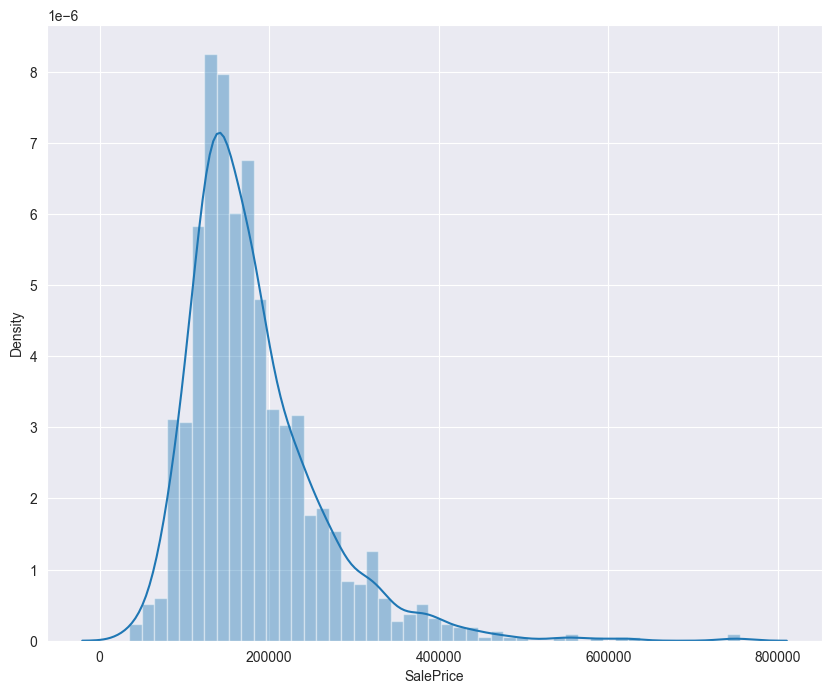

In [315]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(housing_info['SalePrice']);

In [316]:
print('Skew', housing_info['SalePrice'].skew())
print('Kurtosis', housing_info['SalePrice'].kurt())

Skew 1.8828757597682129
Kurtosis 6.536281860064529


**The skewness is greater than 1, so the target variable is highly skewed.**</p>
**The kurtosis is greater than 1, so the distribution of target variable is highly peaked.**

**Let's try to log transform our target variable**

In [317]:
housing_info['SalePrice'] = np.log(housing_info['SalePrice'])

In [318]:
print('Skew', housing_info['SalePrice'].skew())
print('Kurtosis', housing_info['SalePrice'].kurt())

Skew 0.12133506220520406
Kurtosis 0.8095319958036296


**Both skewness and kurtosis are less than 1 now.**

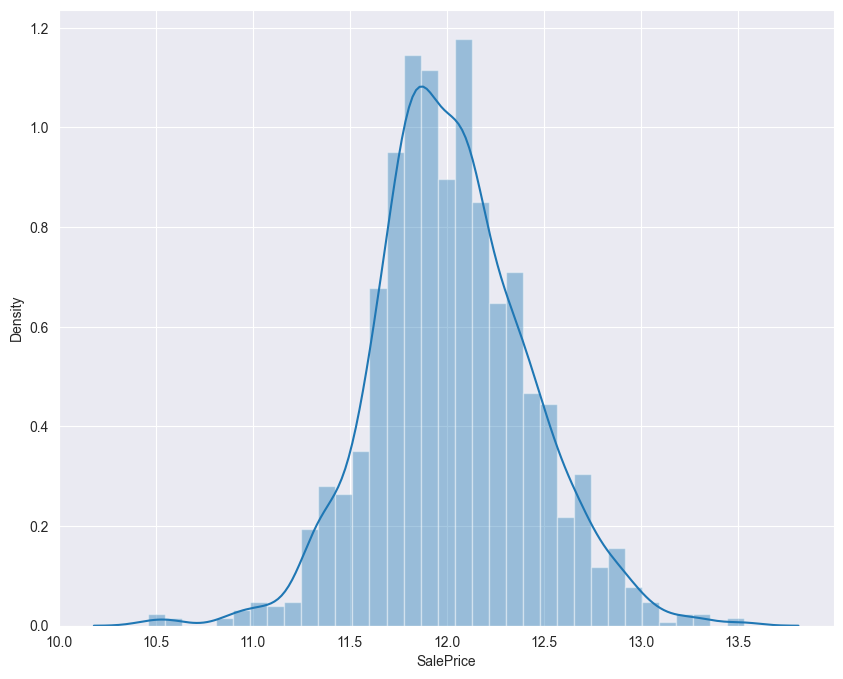

In [319]:
plt.figure(figsize=[10,8])
sns.distplot(housing_info['SalePrice']);

**Our target variable now has a normal distribution**

##### Let's divide our dataset into numerical and categorical variable so that we can treat both types accordingly.

**Extract the numerical variables**

In [320]:
housing_info_num = housing_info.select_dtypes(include=['int64', 'float64'])
housing_info_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1        65.00     8450       2003          2003      196.00         706   
1   2        80.00     9600       1976          1976        0.00         978   
2   3        68.00    11250       2001          2002      162.00         486   
3   4        60.00     9550       1915          1970        0.00         216   
4   5        84.00    14260       2000          2000      350.00         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008      12.25  
1       5    2007      12.11  
2       9    2008      12.32  
3       2    2006      11.85  
4      12    2008      12.43

**Extract the categorical variables**

In [321]:

housing_info_cat = housing_info.select_dtypes(include='object')
housing_info_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

### Univariate Analysis

#### EDA on numerical variables

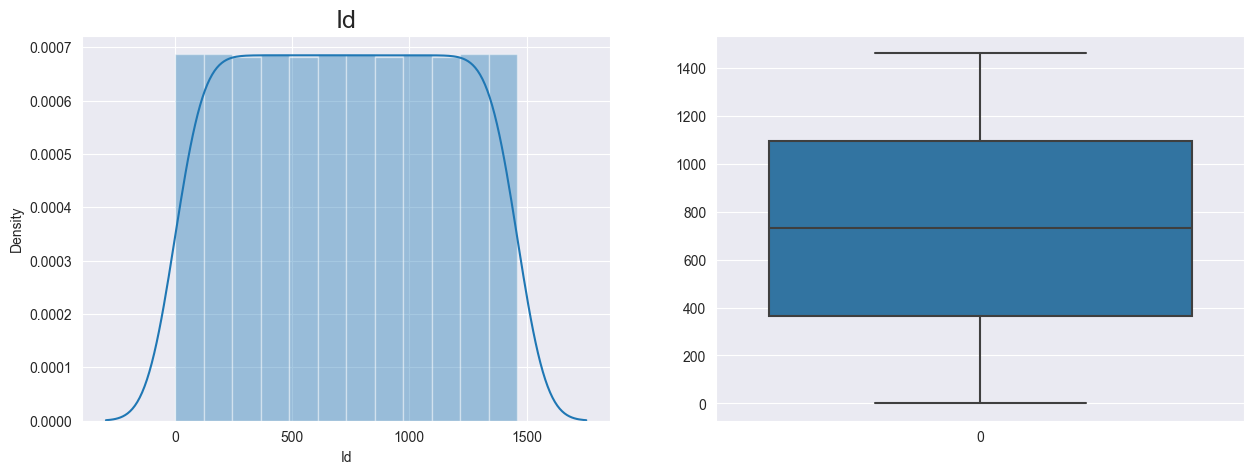

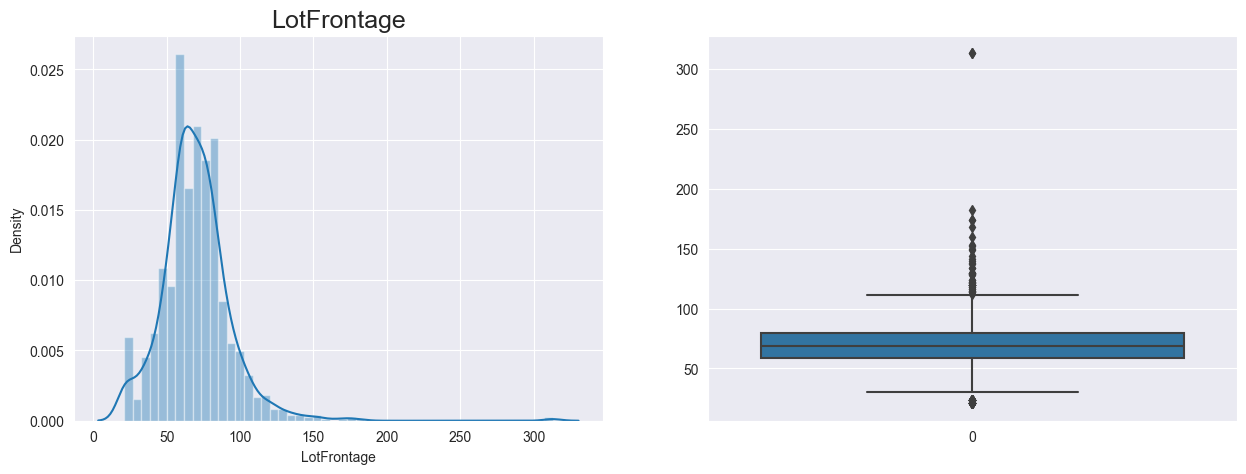

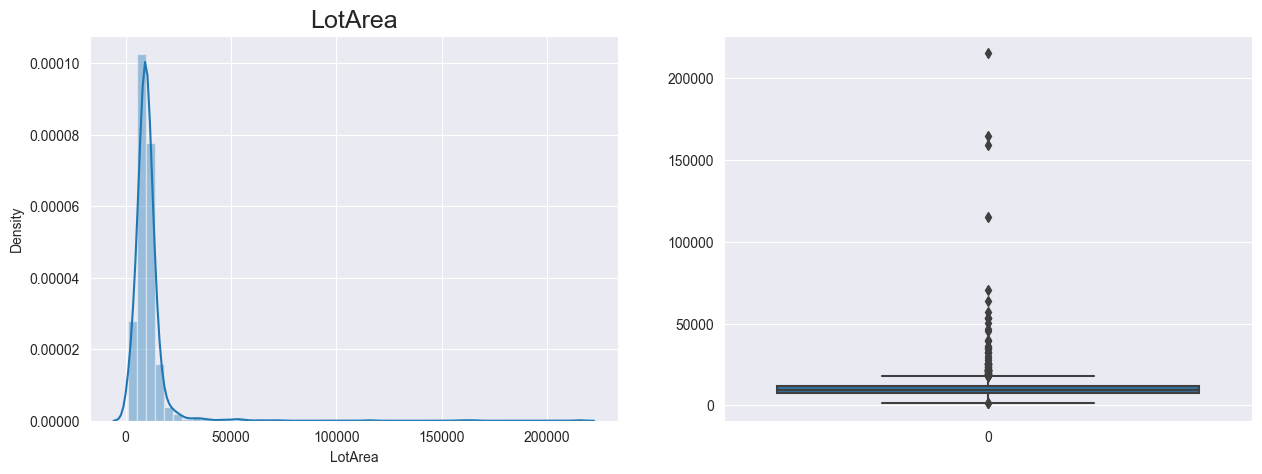

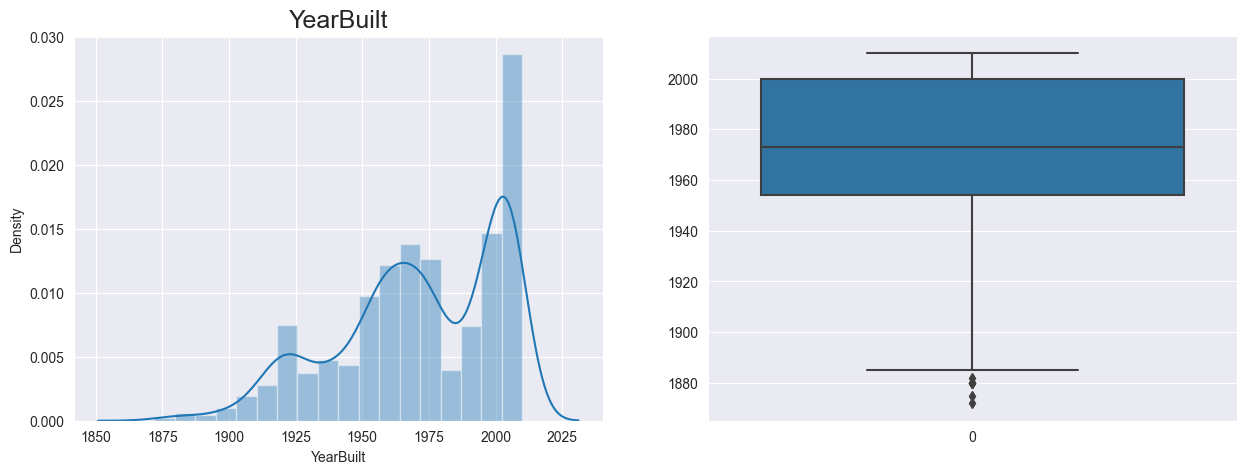

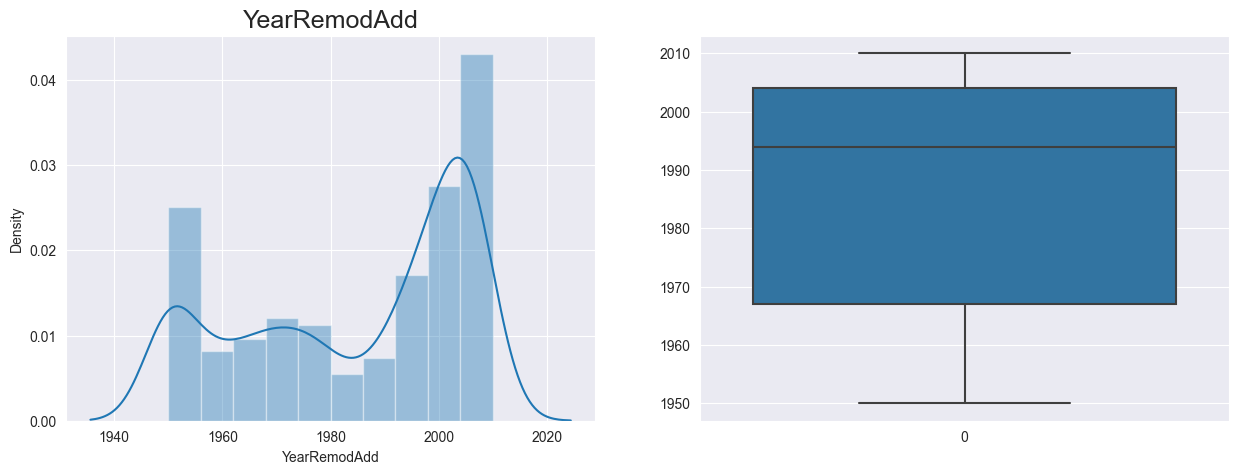

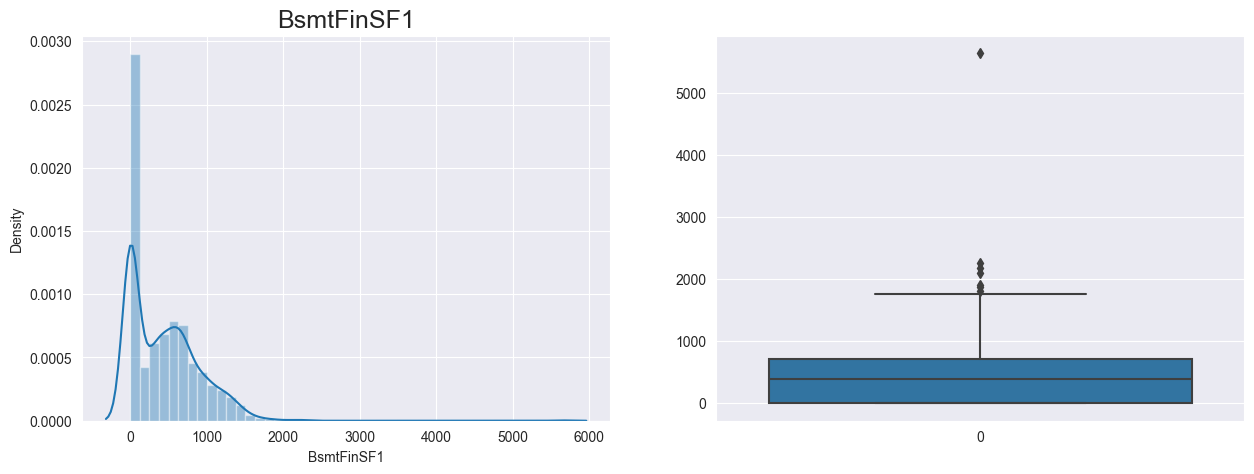

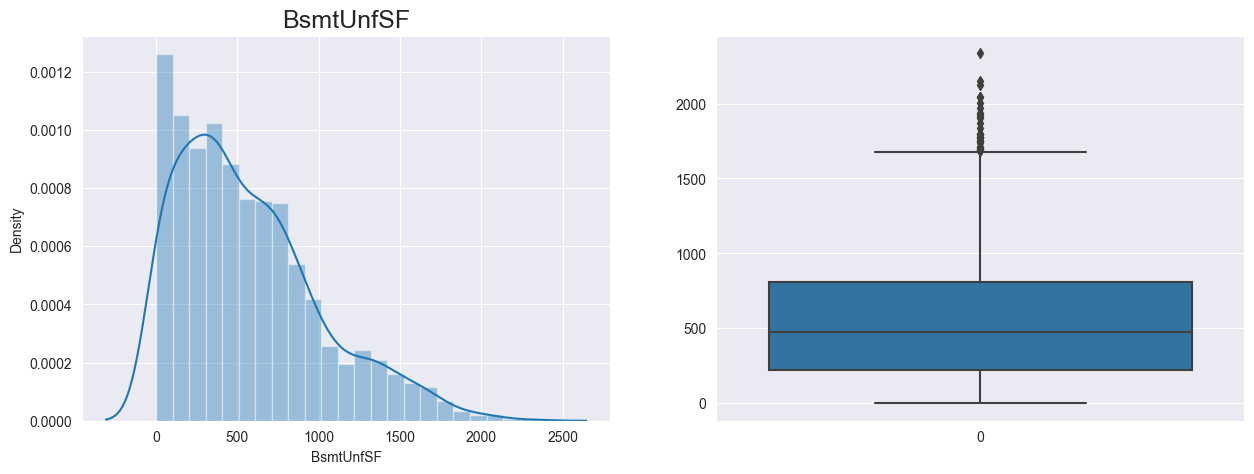

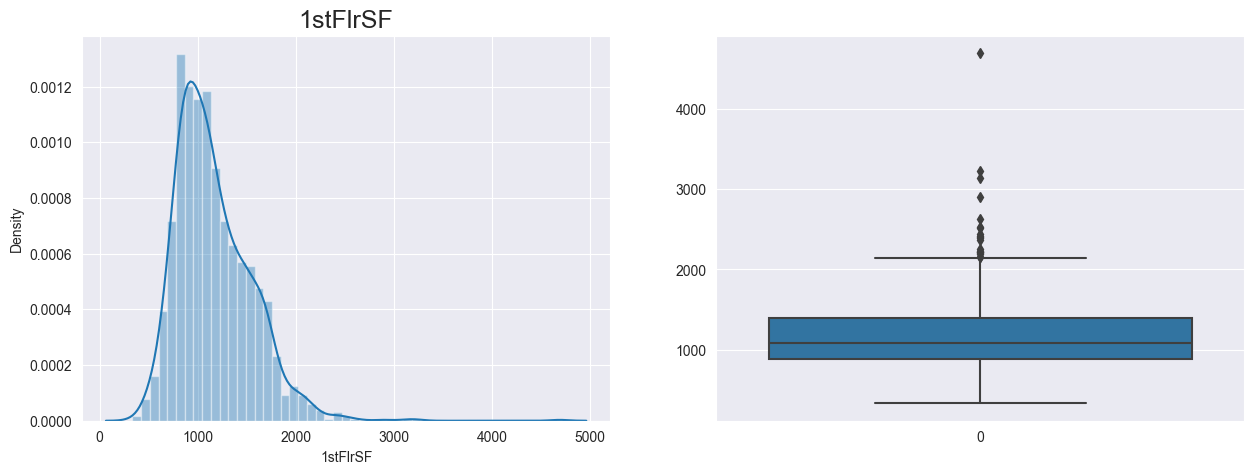

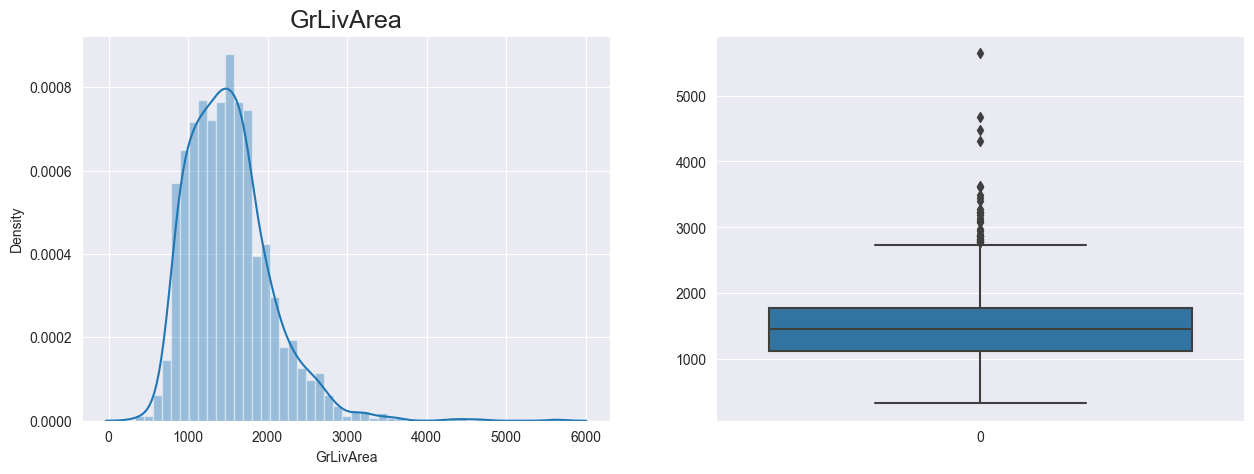

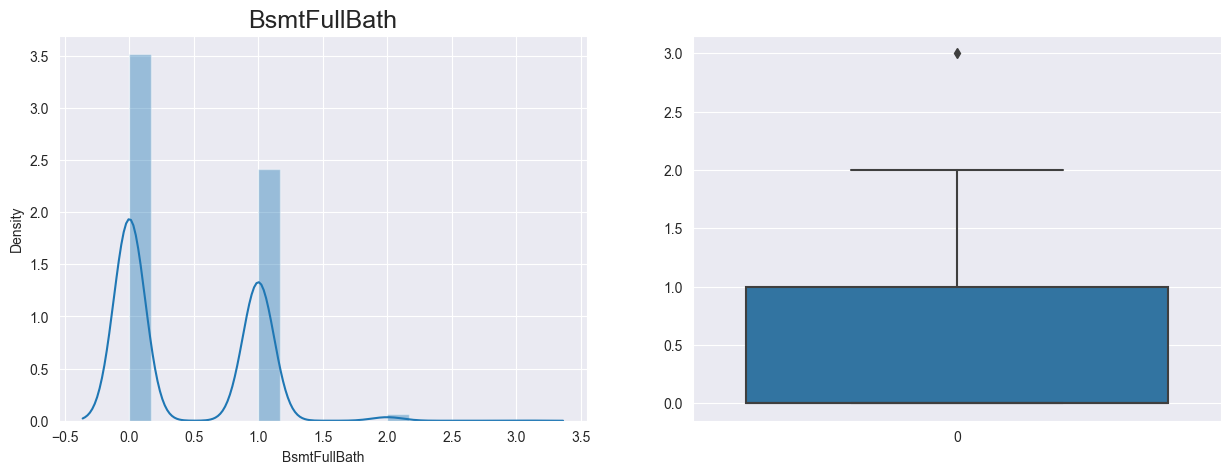

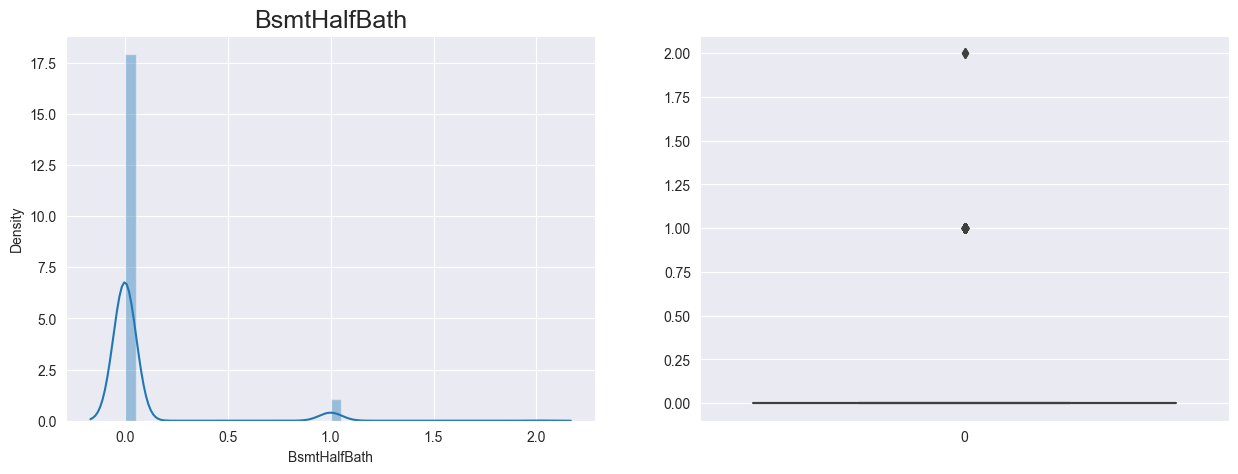

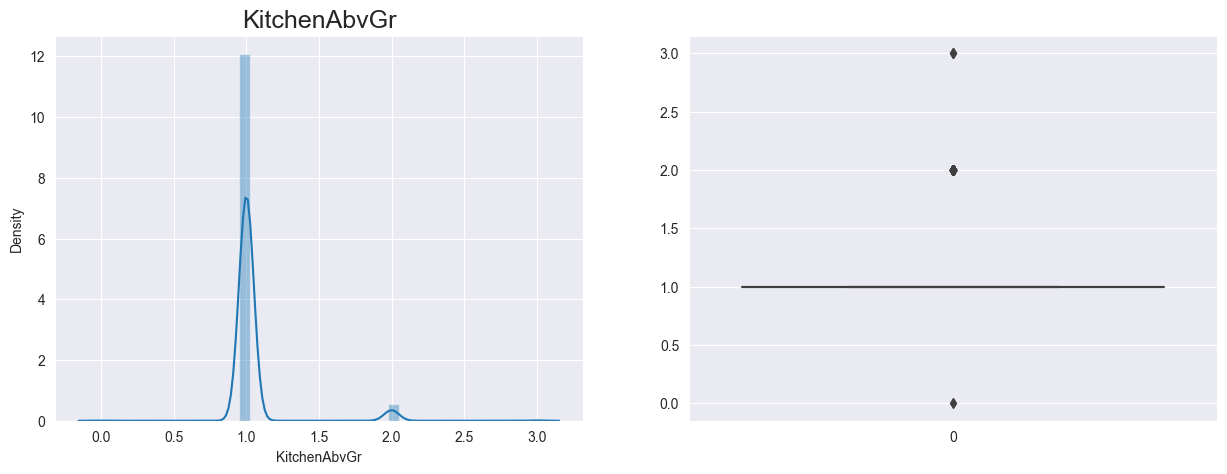

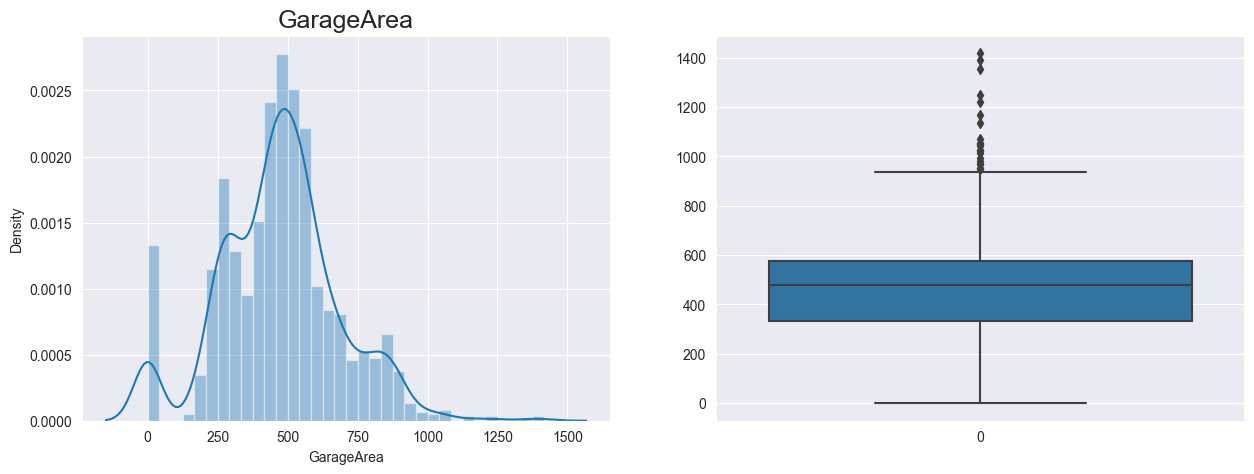

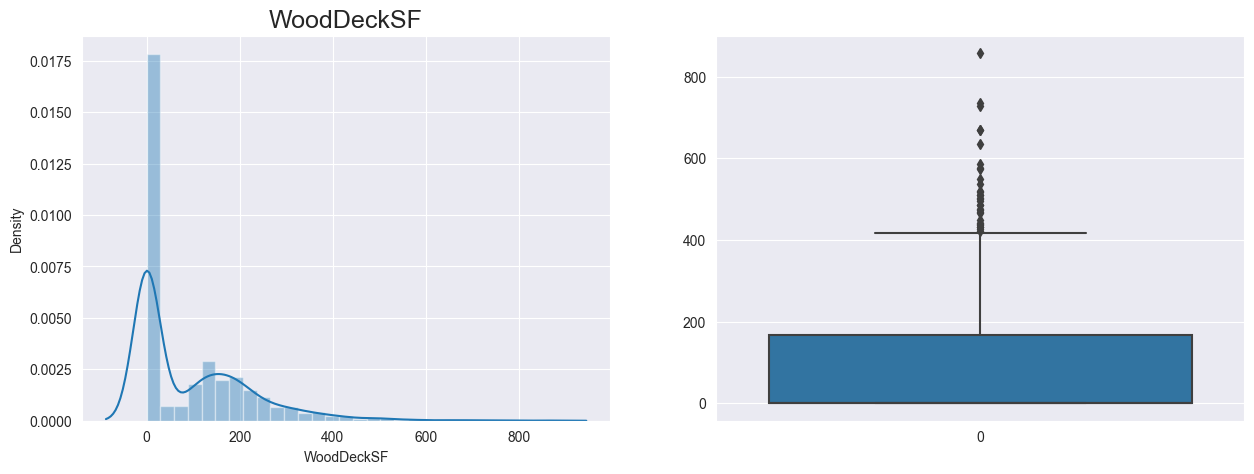

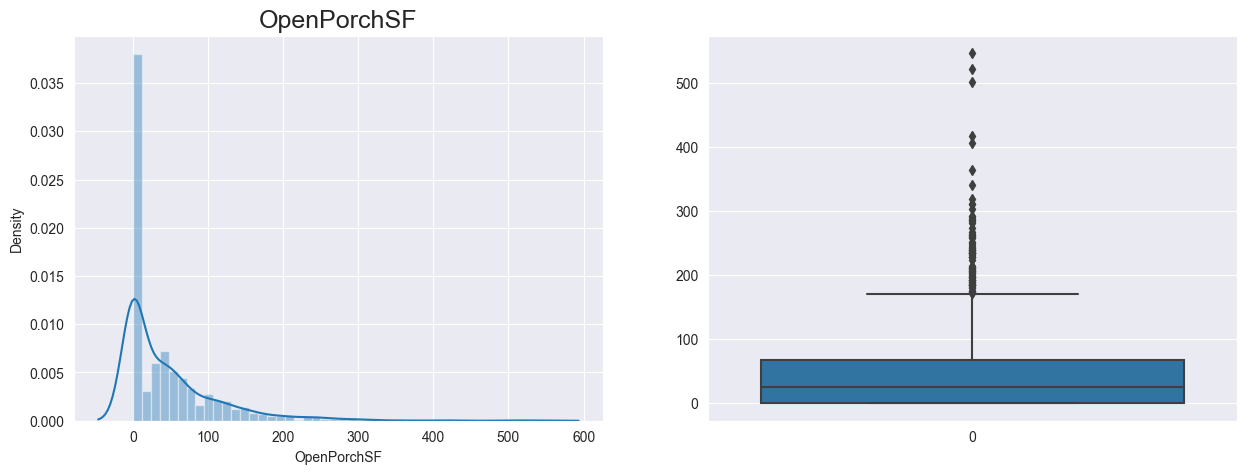

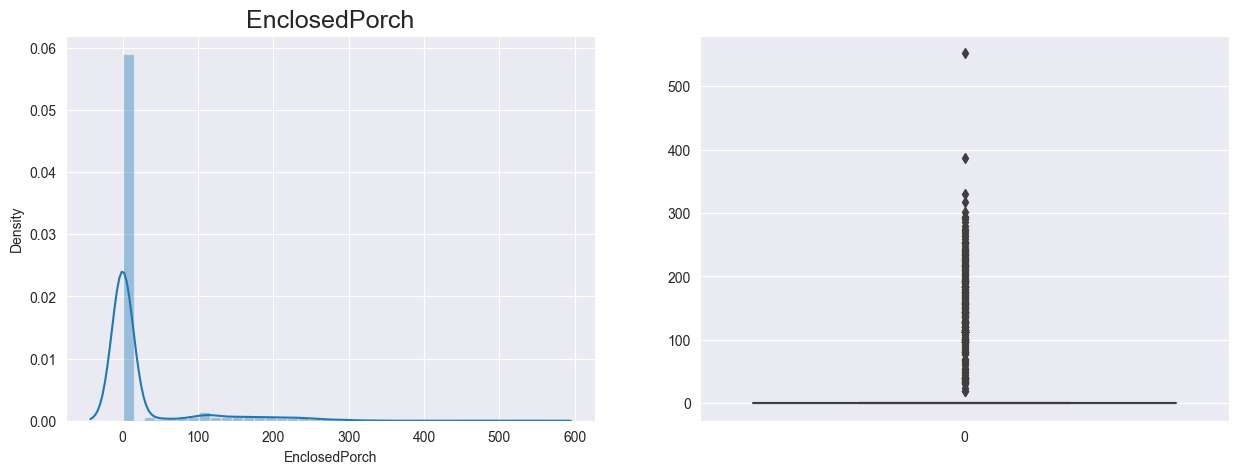

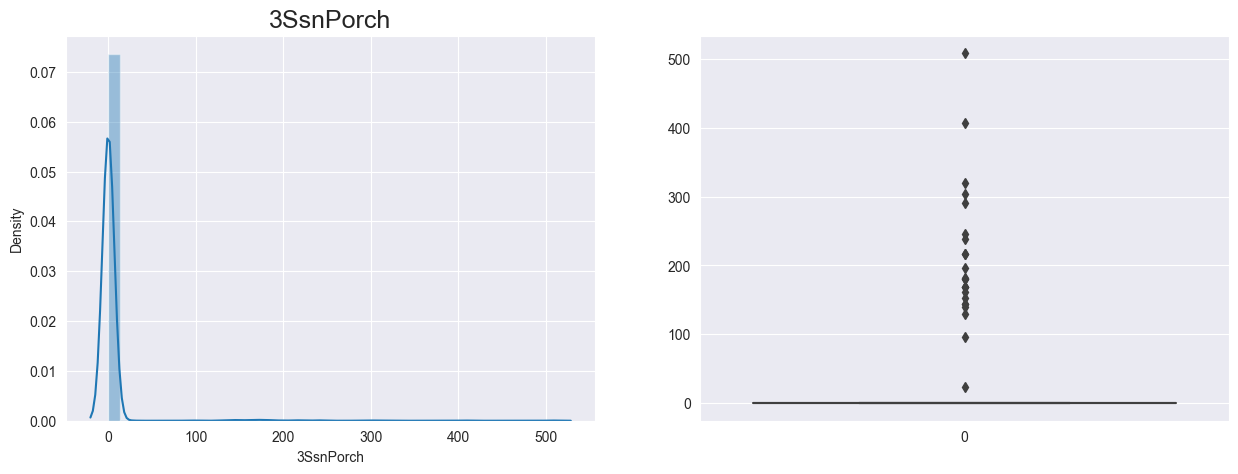

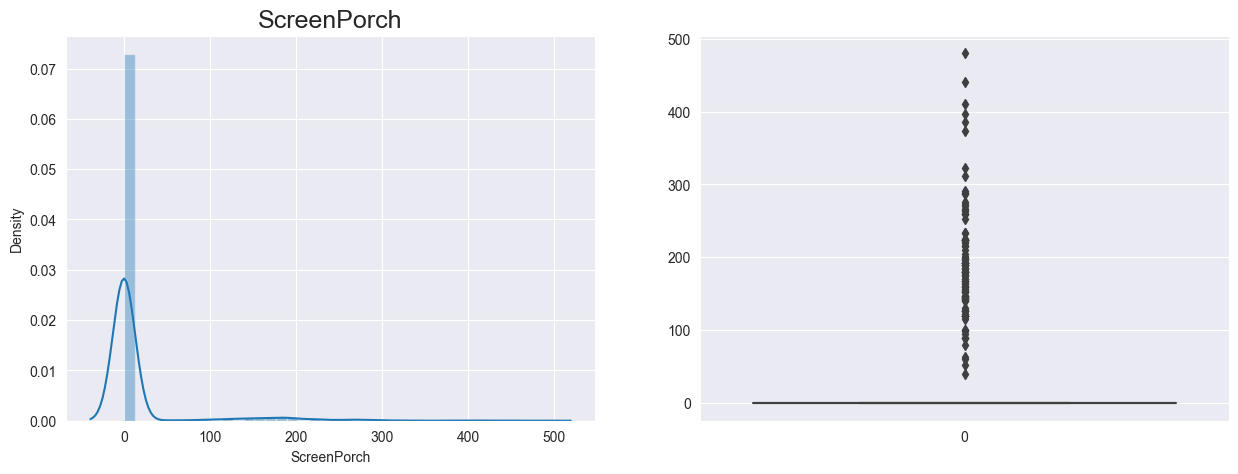

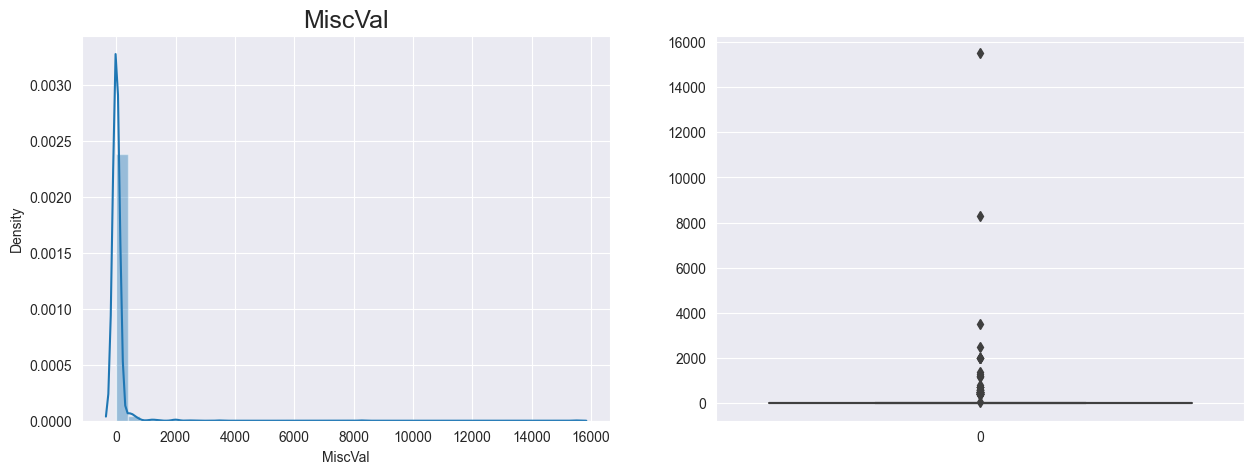

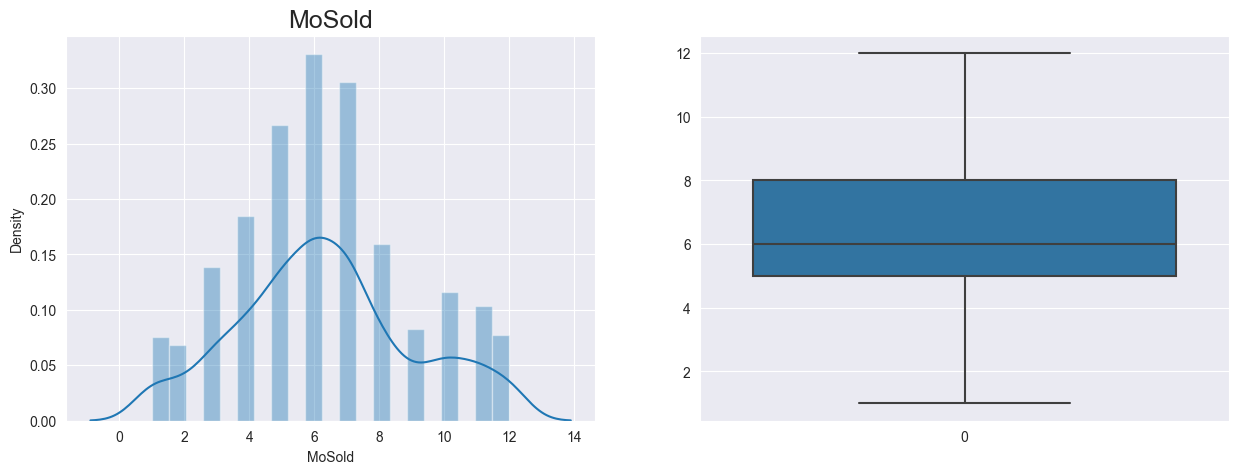

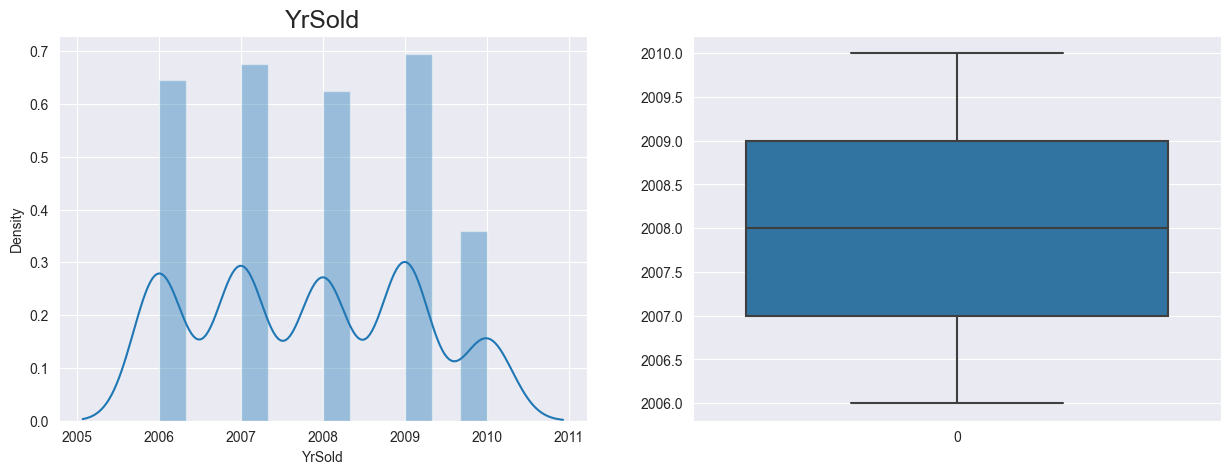

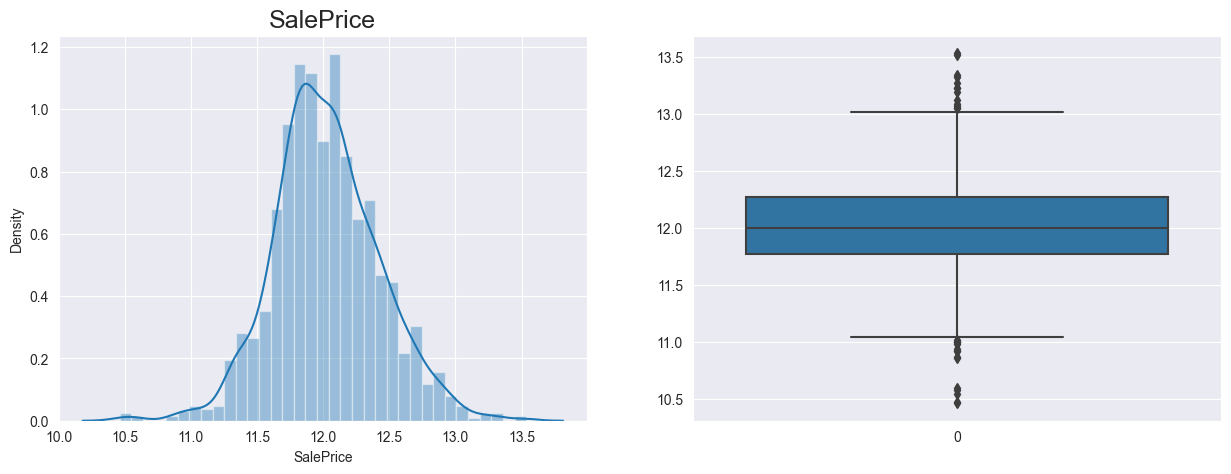

In [322]:
## Extract categorical columns
for col in housing_info_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_info_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_info_num[col])
    plt.show() 

**Most of the numerical variables has non-normal distribution**

**Most of the columns have outliers so this needs to be treated**

#### EDA on categorical variables

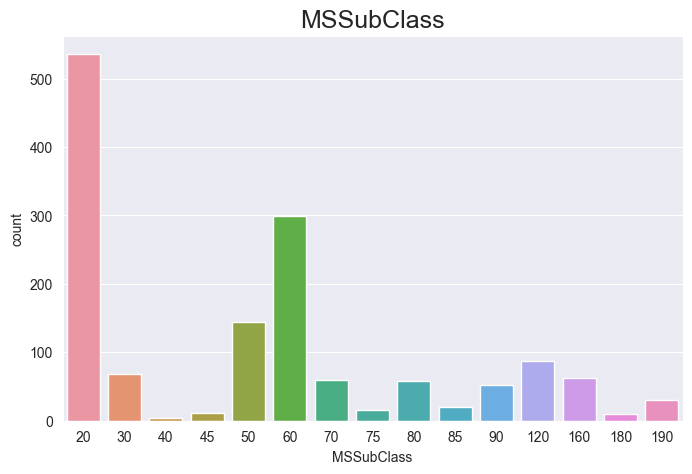

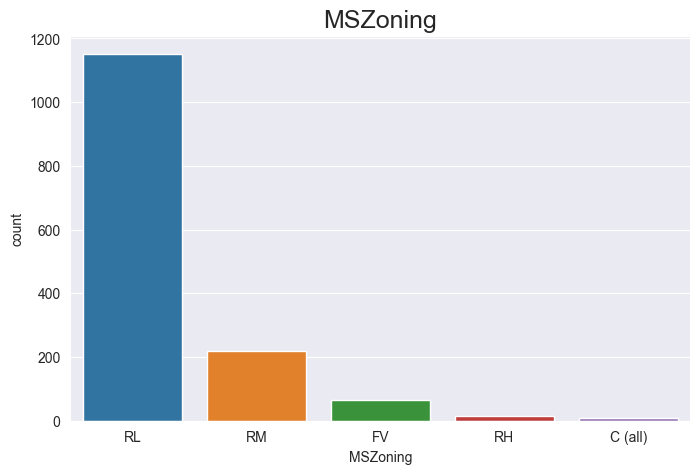

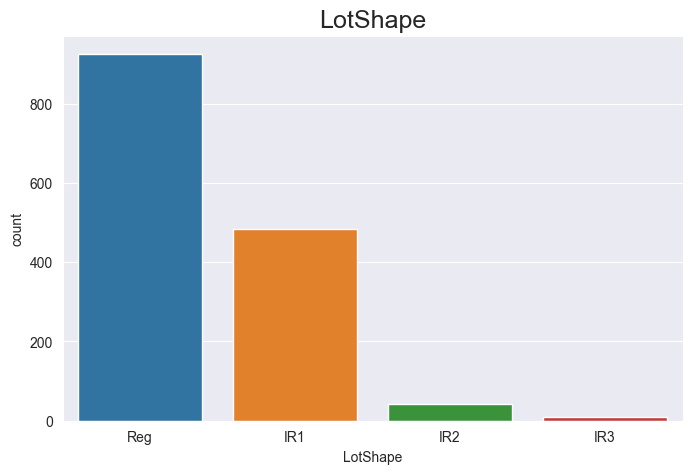

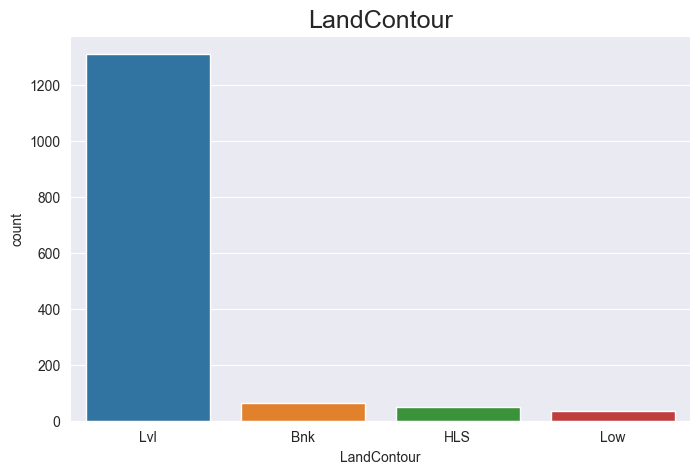

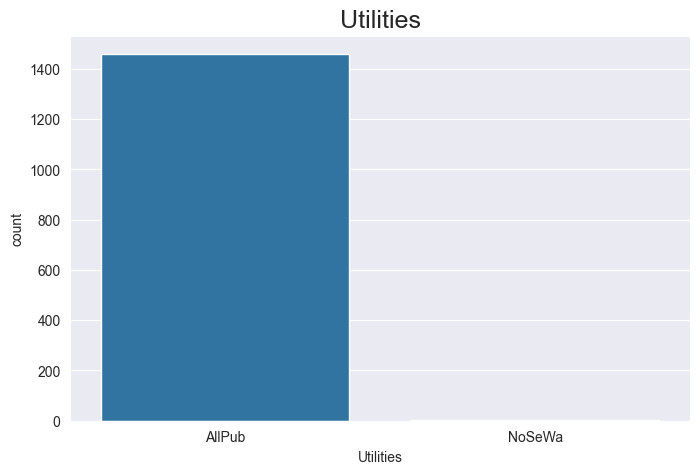

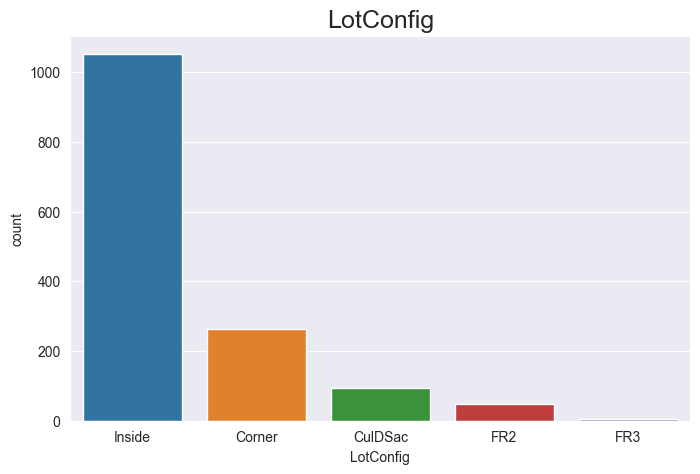

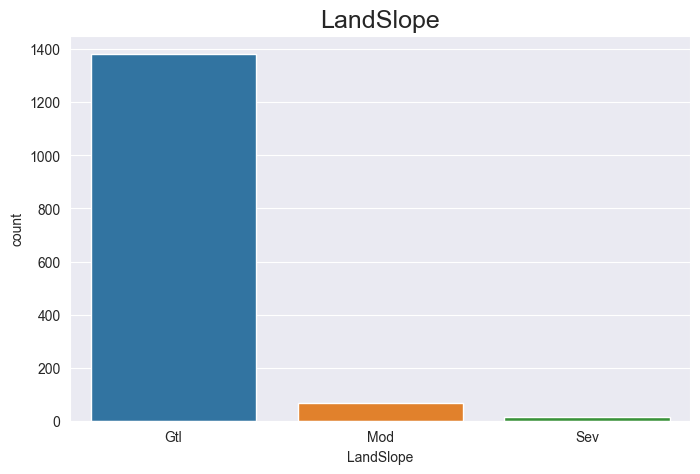

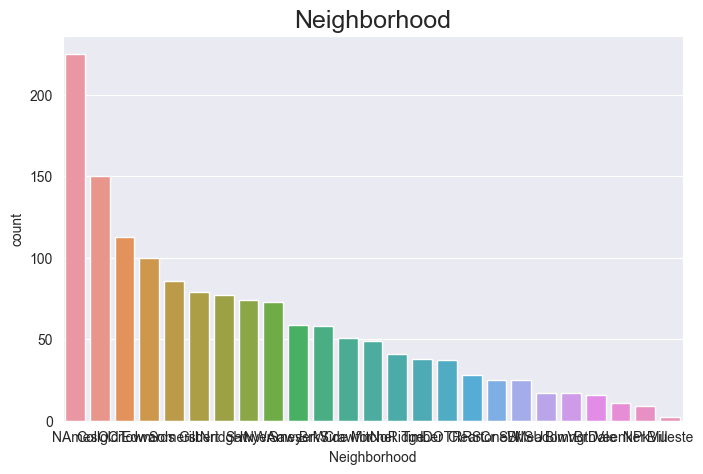

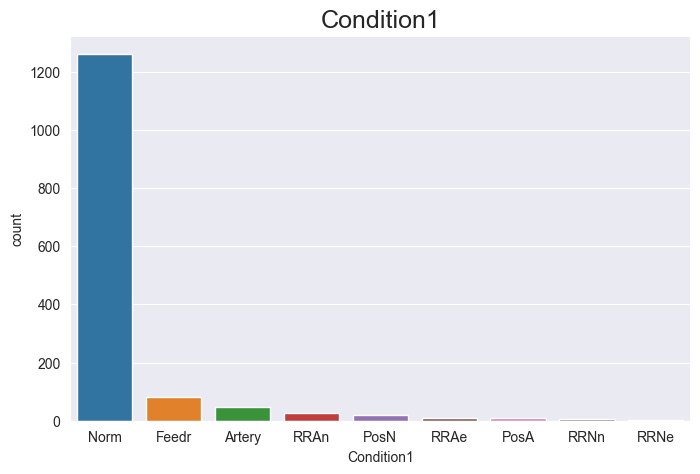

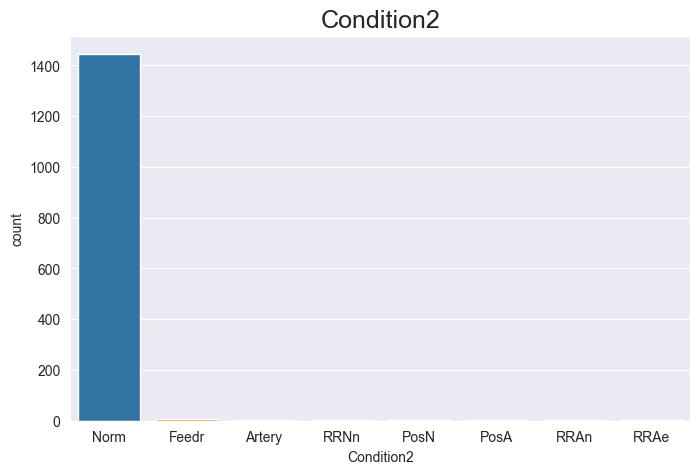

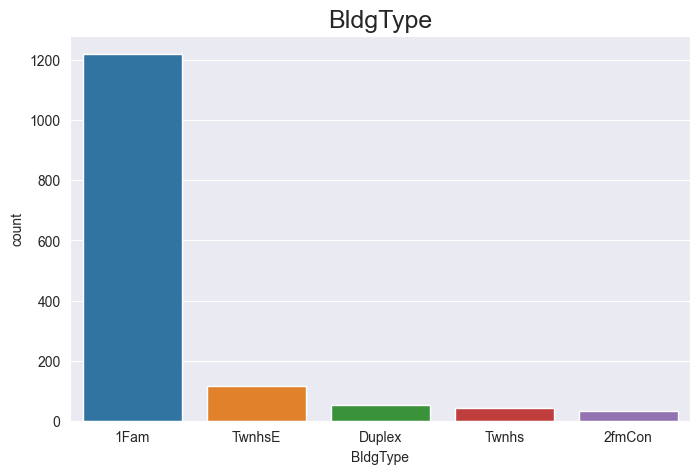

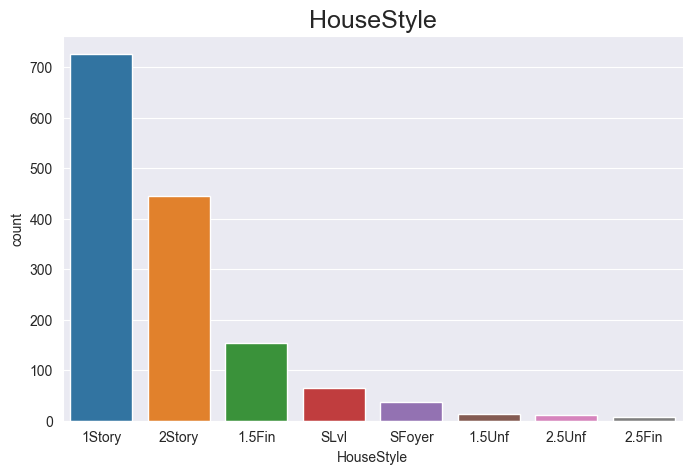

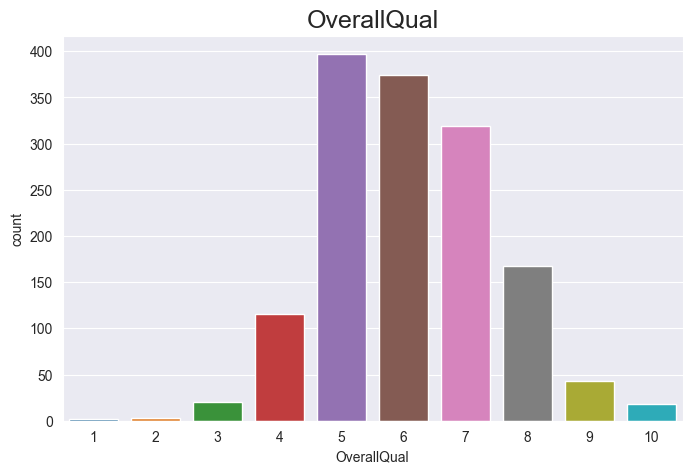

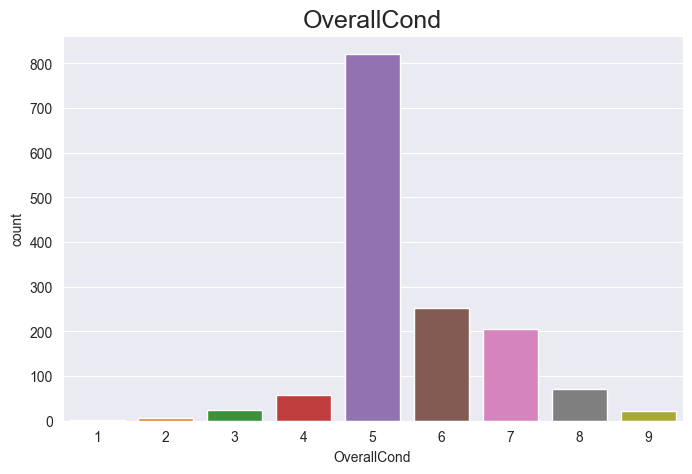

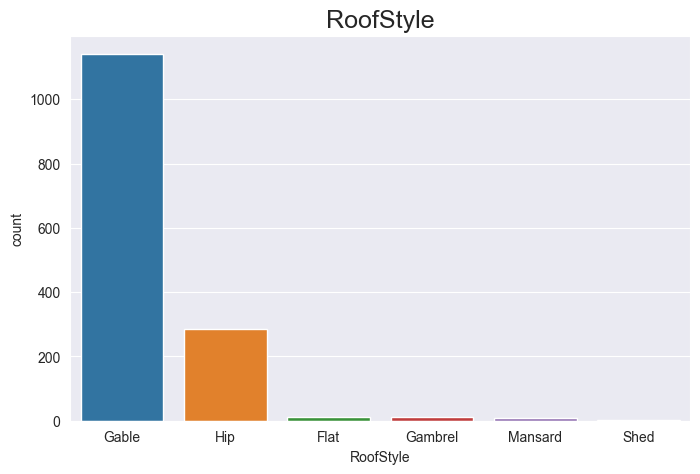

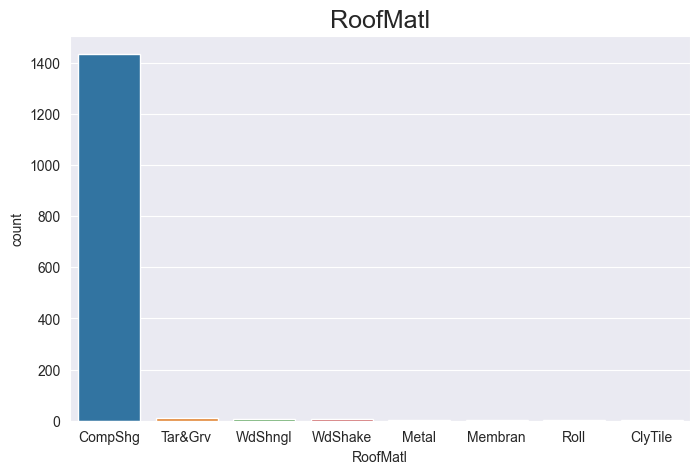

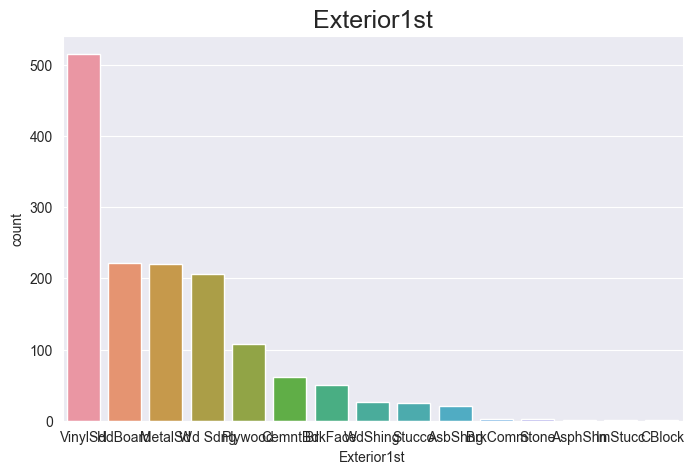

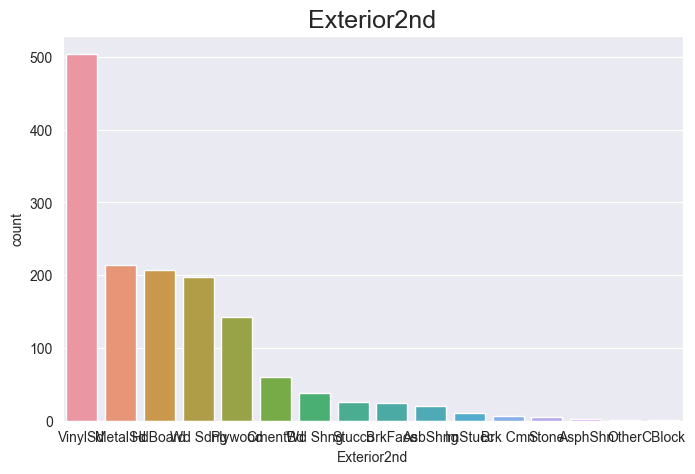

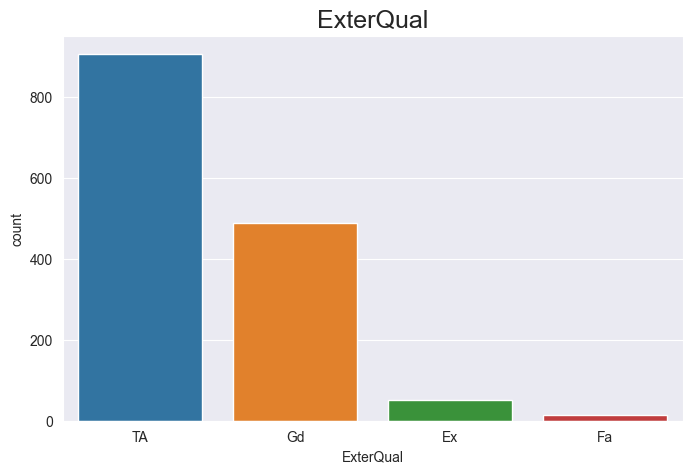

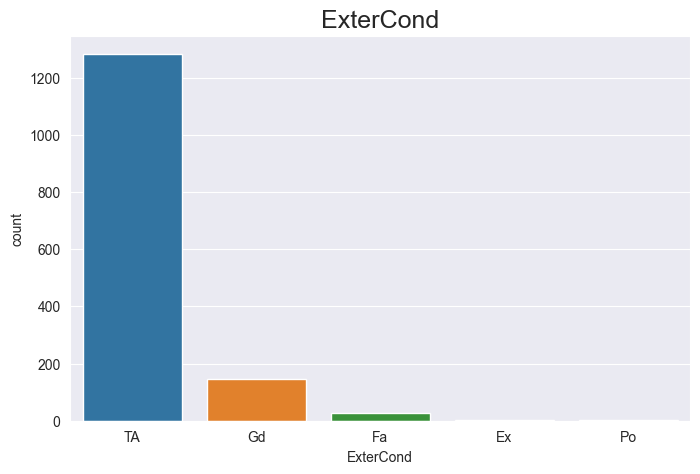

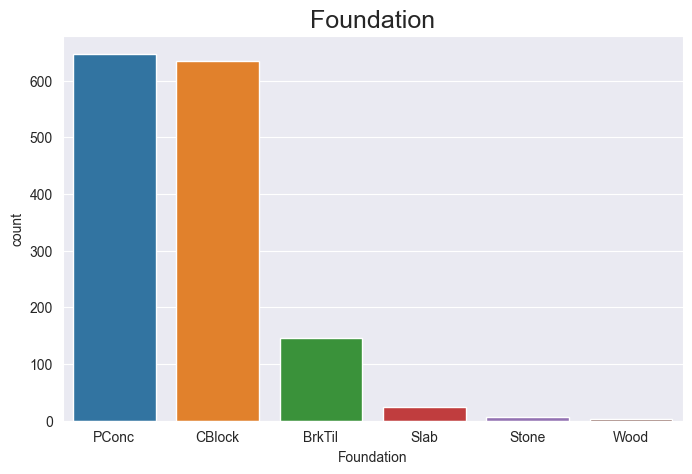

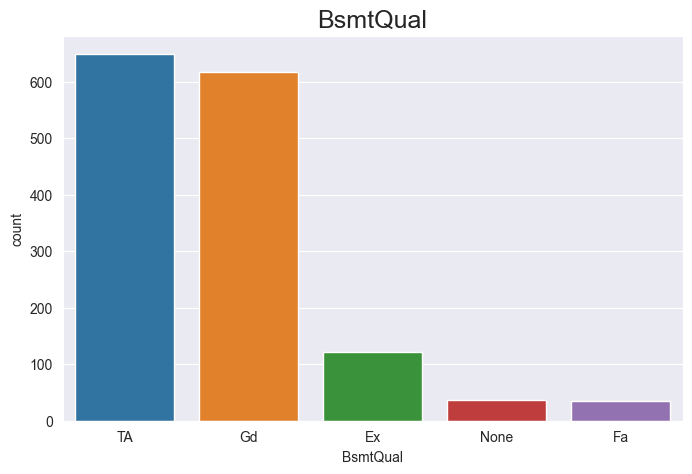

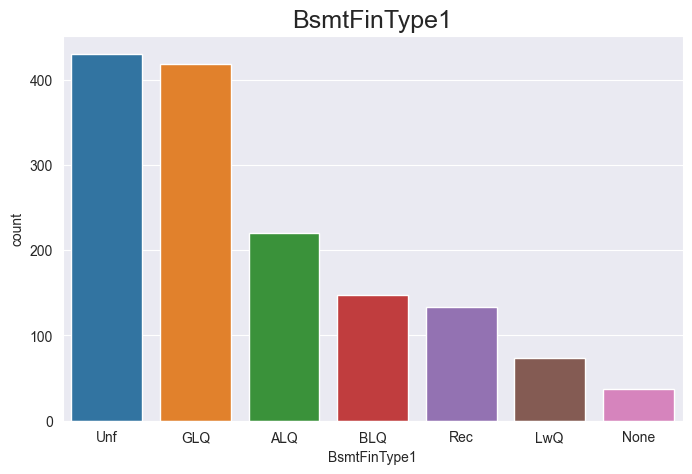

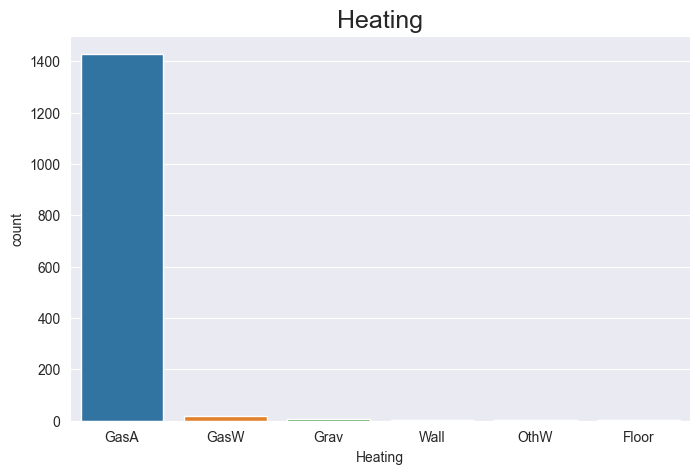

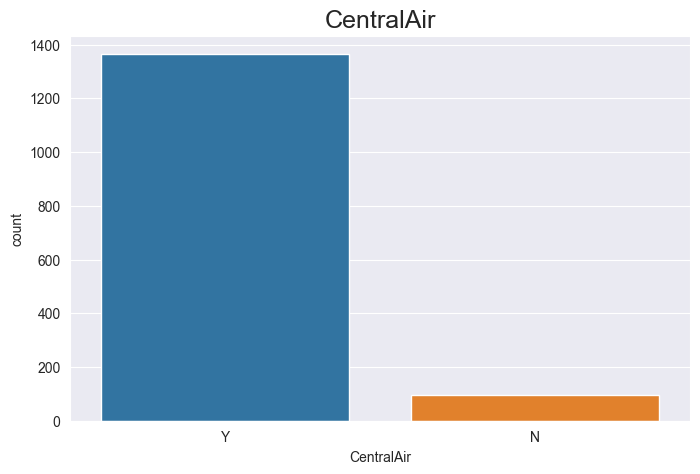

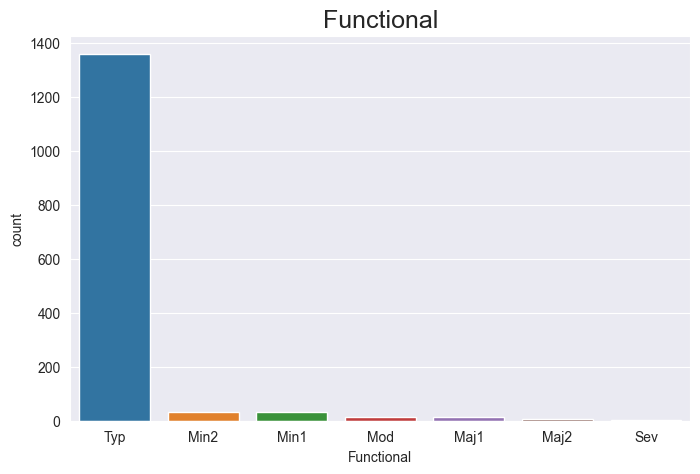

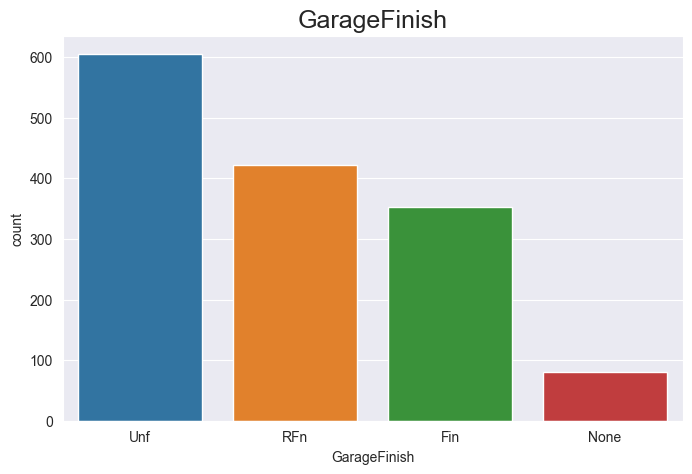

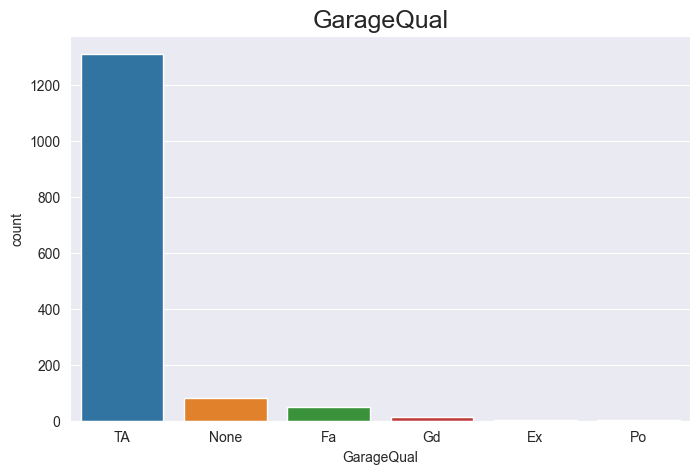

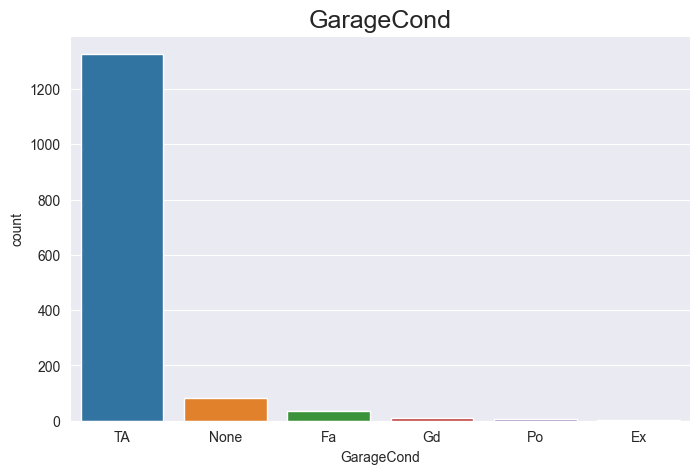

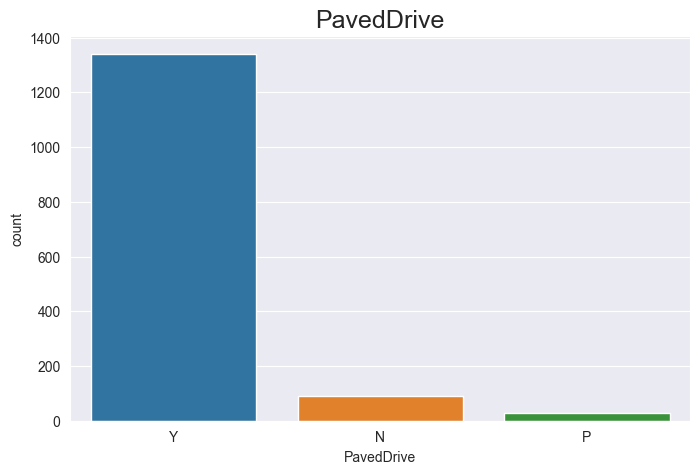

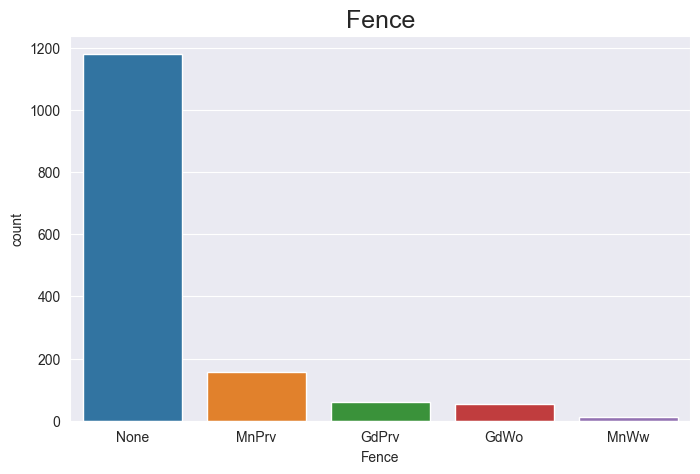

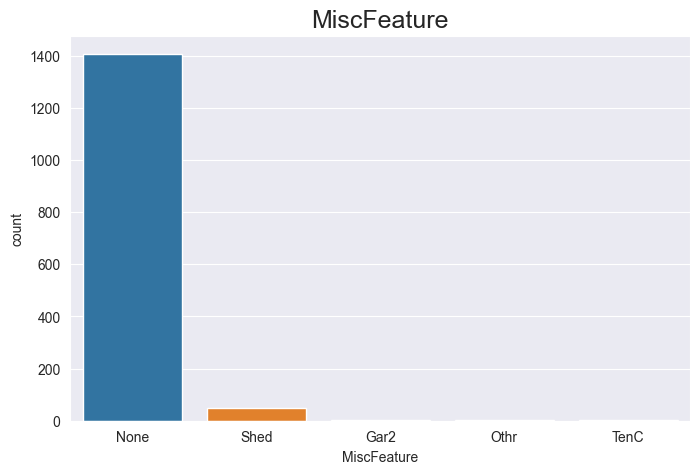

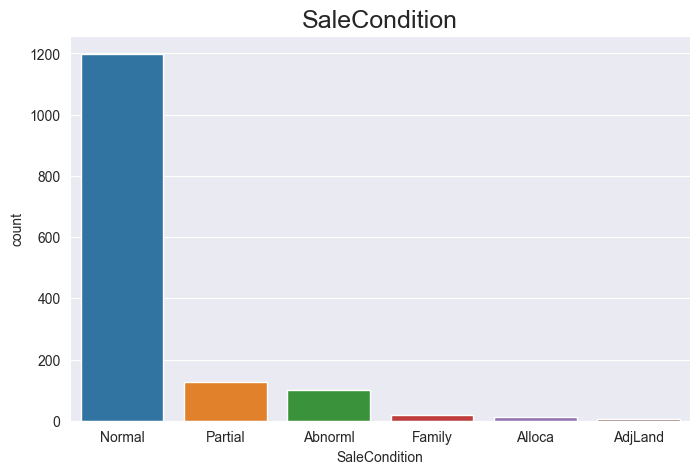

In [323]:
for col in housing_info_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x  = housing_info_cat[col].value_counts().index, y = housing_info_cat[col].value_counts())
    plt.show()

**So we observe from above value counts and bar plots that there is no column with single unique value that we could remove.**

### Bivariate Analysis

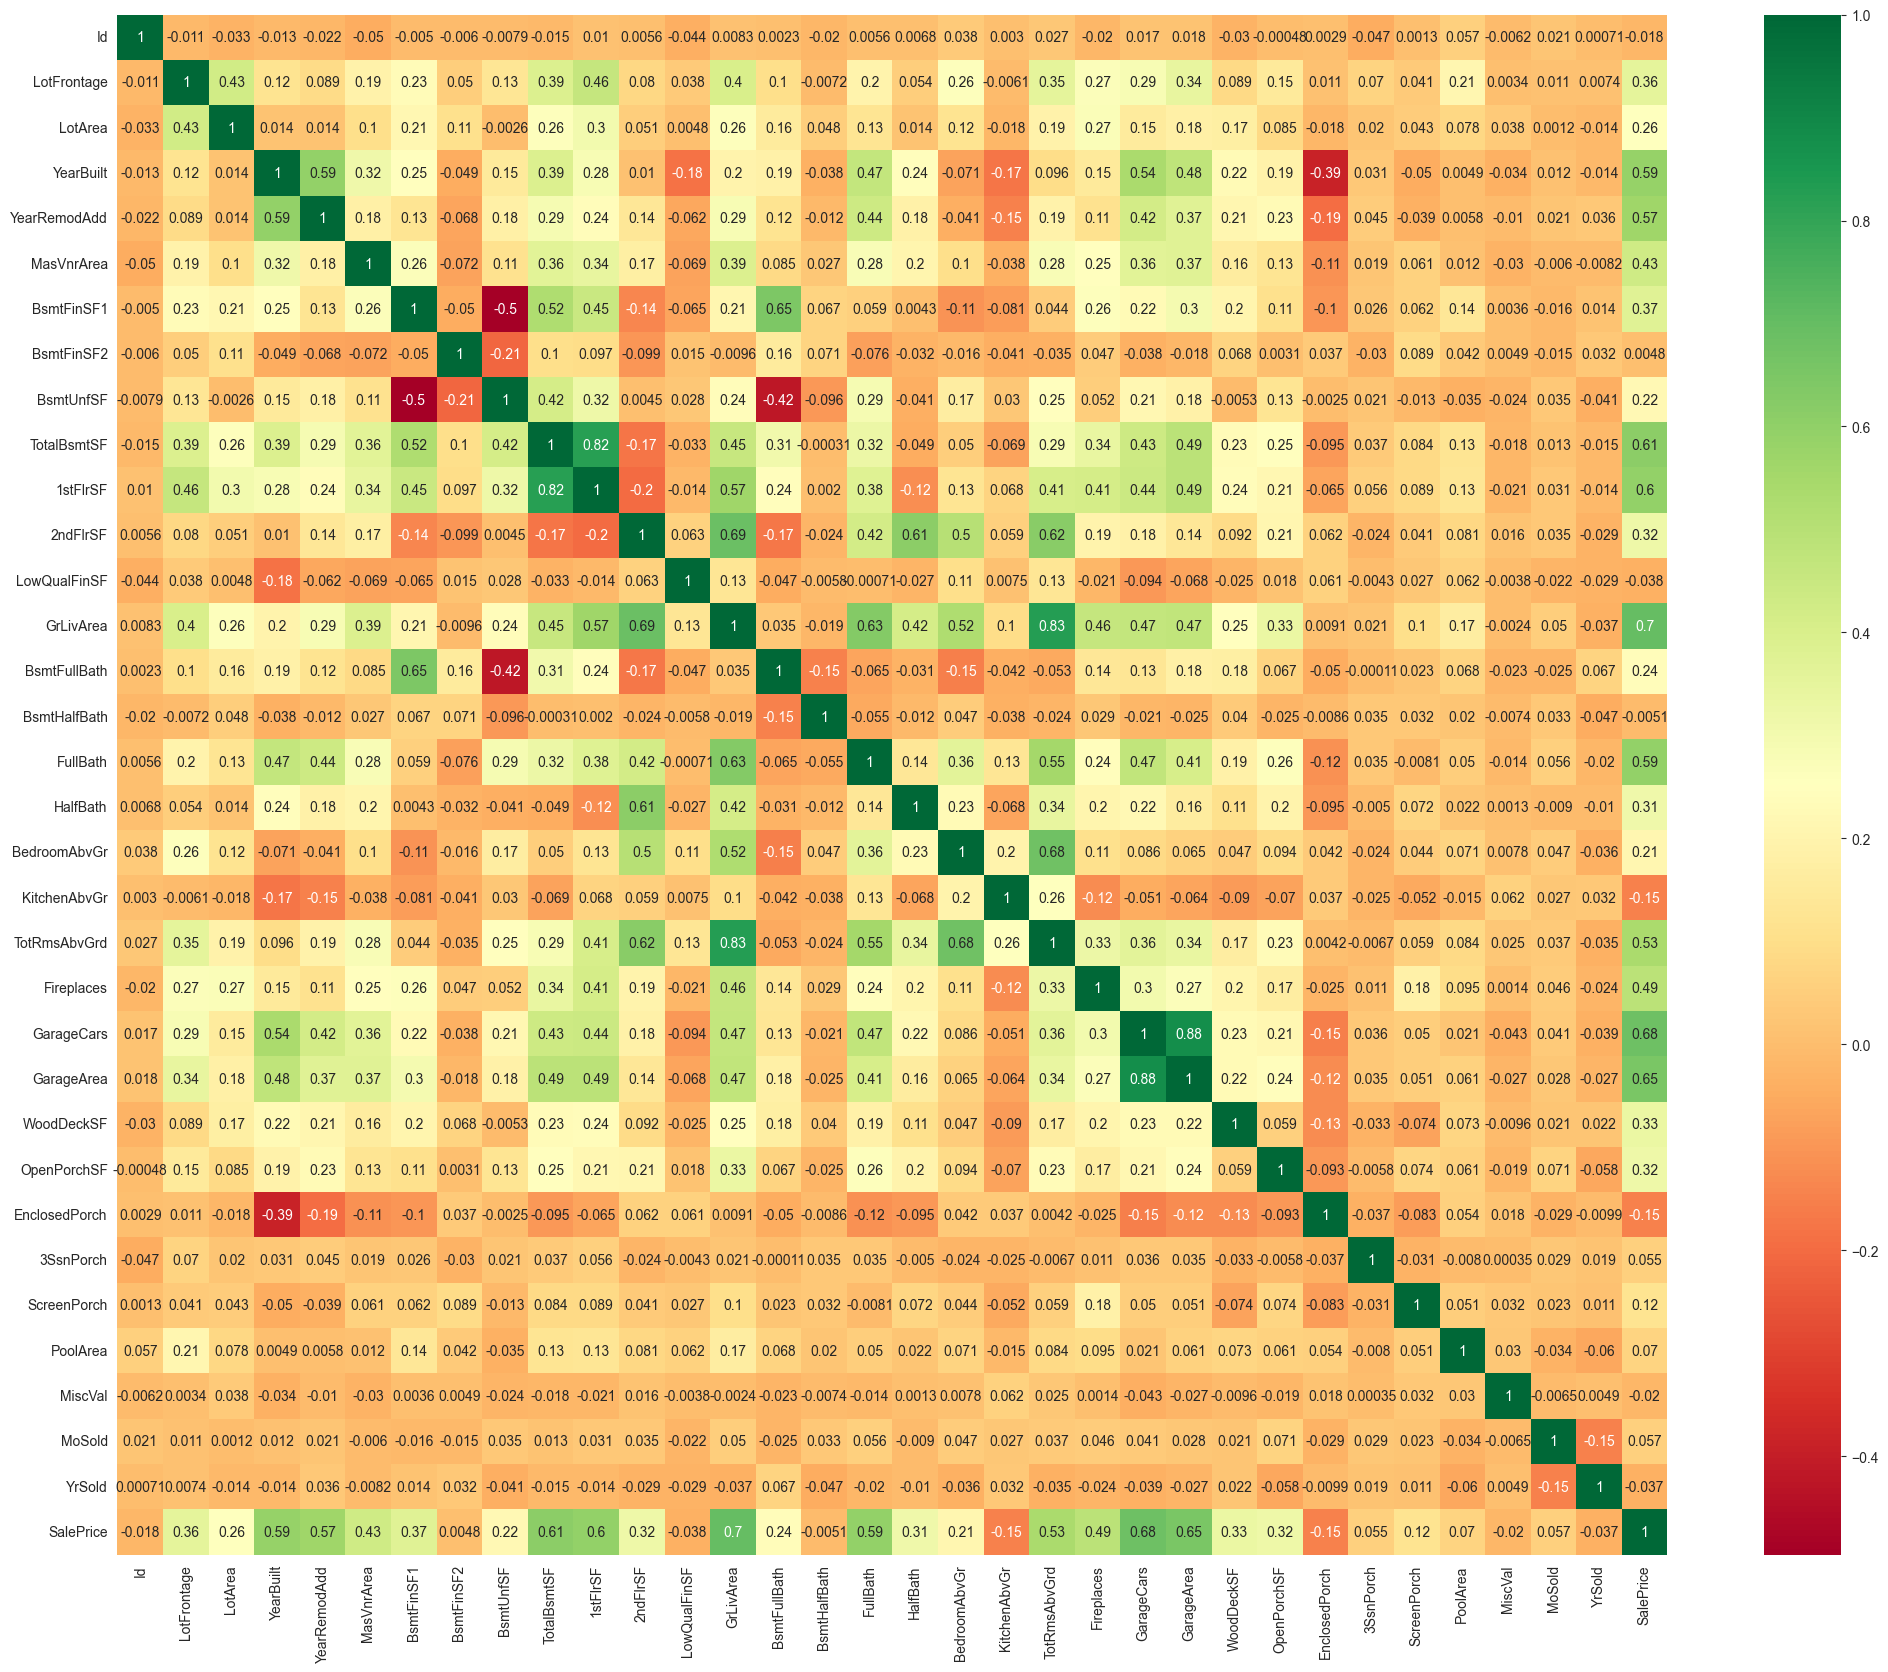

In [324]:
plt.figure(figsize=(25,20))
sns.heatmap(housing_info_num.corr(), annot=True, cmap='RdYlGn');

- Many columns are highly correlated with each other.
- Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
- As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

### Feature Engineering 

**Deriving house age from the year sold and year built**

In [325]:
housing_info['Age'] = housing_info['YrSold'] - housing_info['YearBuilt']

In [326]:
housing_info.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [327]:
housing_info.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL        65.00     8450   Pave  None      Reg   
1   2         20       RL        80.00     9600   Pave  None      Reg   
2   3         60       RL        68.00    11250   Pave  None      IR1   
3   4         70       RL        60.00     9550   Pave  None      IR1   
4   5         60       RL        84.00    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace      196.00        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None        0.00        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace      162.00        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None        0.00        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace      350.00        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

### Data Prepocessing

#### Missing Value Treatment

In [328]:
housing_info.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

**There are missing values only in two columns LotFrontage and MasVnrArea2**

**As these are numerical columns we will replace the missing values with the mean**

In [329]:
housing_info['LotFrontage'].fillna(housing_info['LotFrontage'].mean(), inplace=True)
housing_info['MasVnrArea'].fillna(housing_info['MasVnrArea'].mean(), inplace=True)

In [330]:
housing_info.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### Separating the numerical and categorical variables again.

In [331]:
housing_info_num = housing_info.select_dtypes(include=['int64', 'float64'])
housing_info_cat = housing_info.select_dtypes(include='object')

#### Creating dummy variables from the categorical variables.

In [332]:
housing_info_cat_encoded = pd.get_dummies(housing_info_cat, drop_first=True, dtype='int')
housing_info_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [333]:
housing_info_cat_encoded.shape

(1460, 353)

### Outlier treatment

In [334]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_info_num);

In [335]:
for col in housing_info_num.columns:
    housing_info_num[col][housing_info_num[col] <= housing_info_num[col].quantile(0.05)] = housing_info_num[col].quantile(0.05)
    housing_info_num[col][housing_info_num[col] >= housing_info_num[col].quantile(0.95)] = housing_info_num[col].quantile(0.95)

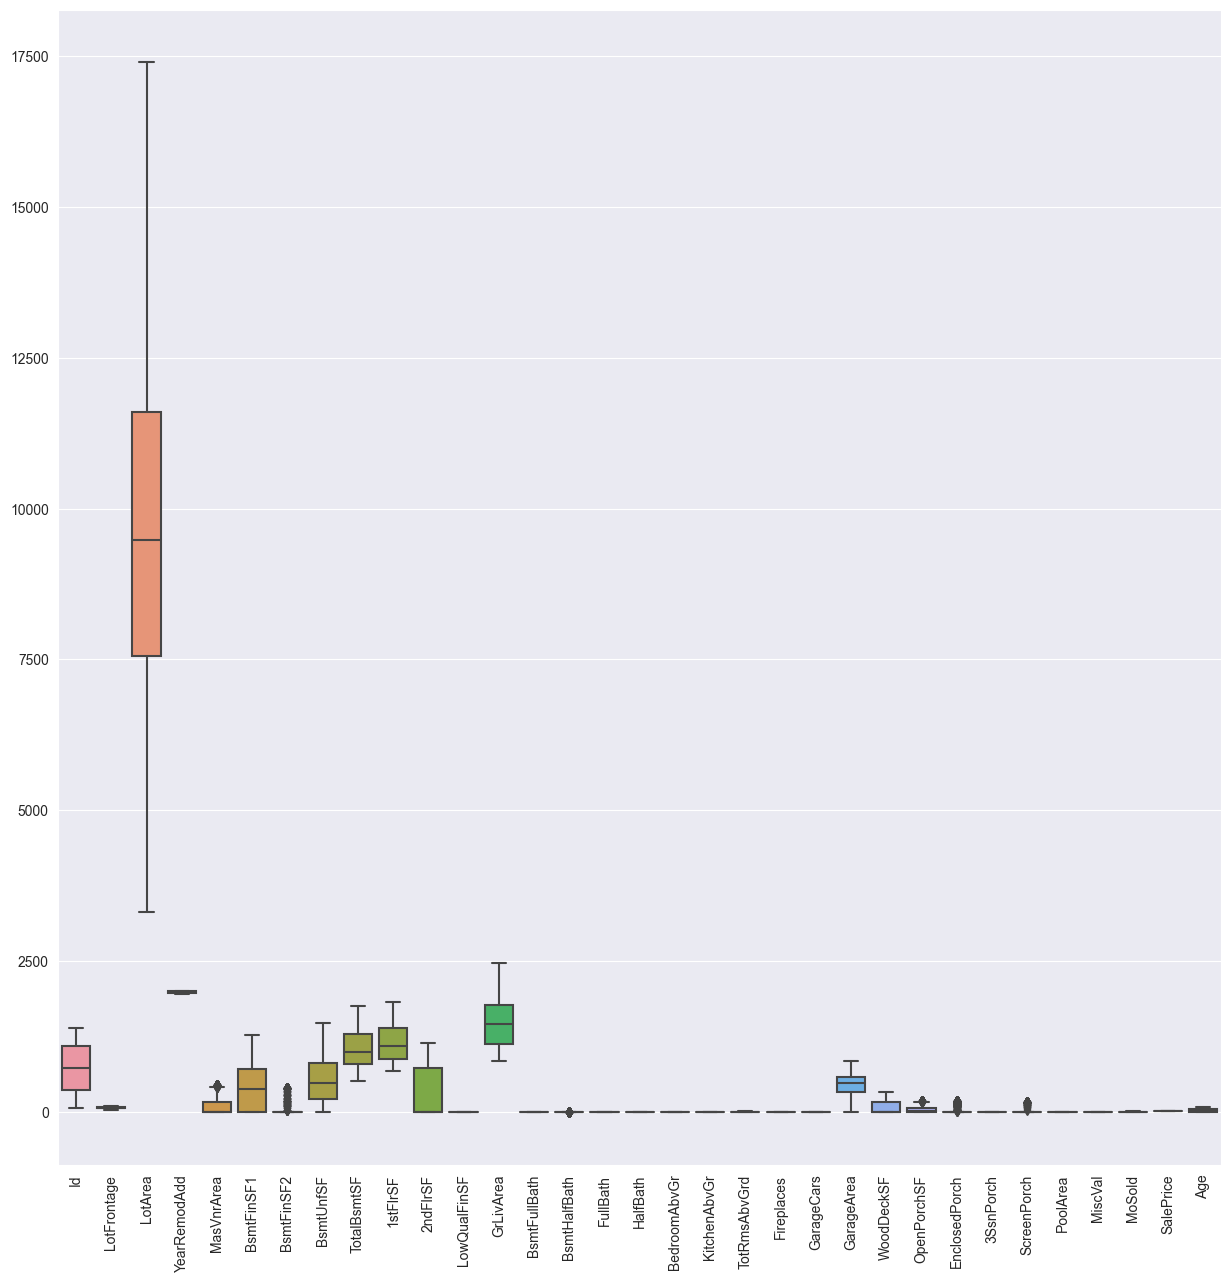

In [336]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_info_num);

**So, outliers have been treated**

**Concatinating the treated numerical and categorical variables**

In [337]:
housing_info = pd.concat([housing_info_num, housing_info_cat_encoded], axis=1)

In [338]:
housing_info.head()

Id  LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0 73.95        65.00  8,450.00          2003      196.00         706   
1 73.95        80.00  9,600.00          1976        0.00         978   
2 73.95        68.00 11,250.00          2002      162.00         486   
3 73.95        60.00  9,550.00          1970        0.00         216   
4 73.95        84.00 14,260.00          2000      350.00         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.00        150       856.00    856.00    854.00             0   
1        0.00        284     1,262.00  1,262.00      0.00             0   
2        0.00        434       920.00    920.00    866.00             0   
3        0.00        540       756.00    961.00    756.00             0   
4        0.00        490     1,145.00  1,145.00  1,053.00             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   1,710.00             1             0         2         1             3   
1   1,262.00             0             1         2         0             3   
2   1,786.00             1             0         2         1             3   
3   1,717.00             1             0         1         0             3   
4   2,198.00             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2      548.00           0   
1             1             6           1           2      460.00         298   
2             1             6           1           2      608.00           0   
3             1             7           1           3      642.00           0   
4             1             9           1           3      836.00         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0        61.00           0.00          0            0         0        0   
1         0.00           0.00          0            0         0        0   
2        42.00           0.00          0            0         0        0   
3        35.00         180.15          0            0         0        0   
4        84.00           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2      12.25    5              0              0              0   
1       5      12.11   31              0              0              0   
2       9      12.32    7              0              0              0   
3       2      11.85   91              0              0              0   
4      11      12.43    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   

**Now the dataset is ready for model building**

### Model Building, Tuning and Evaluation

##### Split the Data into Dependent and Independent variables

In [339]:
X = housing_info.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0        65.00  8,450.00          2003      196.00         706        0.00   
1        80.00  9,600.00          1976        0.00         978        0.00   
2        68.00 11,250.00          2002      162.00         486        0.00   
3        60.00  9,550.00          1970        0.00         216        0.00   
4        84.00 14,260.00          2000      350.00         655        0.00   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150       856.00    856.00    854.00             0   1,710.00   
1        284     1,262.00  1,262.00      0.00             0   1,262.00   
2        434       920.00    920.00    866.00             0   1,786.00   
3        540       756.00    961.00    756.00             0   1,717.00   
4        490     1,145.00  1,145.00  1,053.00             0   2,198.00   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2      548.00           0        61.00   
1             6           1           2      460.00         298         0.00   
2             6           1           2      608.00           0        42.00   
3             7           1           3      642.00           0        35.00   
4             9           1           3      836.00         192        84.00   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3      

In [340]:
y = housing_info["SalePrice"].copy()
y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

#### Train-Test split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

**Checking shape of train data**

In [342]:
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


**Checking shape of test data**

In [343]:
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


#### Scaling numerical variables

In [344]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [345]:
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model 1. Ridge Regression

In [346]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    """
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    """
    metric = []
    
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)

    return metric

**We will create a list of alphas and then create a model based on those alphas and find the optimal value of alpha**

In [347]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [348]:
GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

**Checking the best params of the model**

In [349]:
ridgeCV.best_params_

{'alpha': 10.0}

In [350]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.10438704, 0.09612432, 0.10635905, 0.06549149, 0.07561421,
        0.05475874, 0.0868484 , 0.07903943, 0.11213641, 0.06480699,
        0.07726731, 0.0786448 , 0.09157367, 0.08496981, 0.06797066,
        0.07678695, 0.07667871, 0.07565956, 0.08664684, 0.07765713,
        0.07781787, 0.06756063, 0.09771504, 0.06967025, 0.08378553,
        0.07173638, 0.07973986, 0.06024551]),
 'std_fit_time': array([0.0146719 , 0.01481269, 0.0133634 , 0.03423218, 0.05334755,
        0.00482096, 0.04470085, 0.01182988, 0.02246309, 0.00705182,
        0.02033179, 0.01642994, 0.03100754, 0.02642628, 0.01369426,
        0.01385842, 0.01123545, 0.02199124, 0.02186717, 0.0076066 ,
        0.01628536, 0.00488967, 0.04787139, 0.00976589, 0.02249217,
        0.00823842, 0.01150069, 0.00812378]),
 'mean_score_time': array([0.00992365, 0.00934124, 0.01517448, 0.02513123, 0.0086319 ,
        0.00762048, 0.01206198, 0.0116631 , 0.01379251, 0.01443624,
        0.0206439 , 0.01279831, 0.014874

##### We have got the optimal value of alpha and now on the basis of that alpha we can create a model.

In [351]:
ridge = Ridge(alpha=10)

In [352]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [353]:
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

##### Lets predict the values and evaluate the model on the basis of that

In [354]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [355]:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01


##### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [356]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0            0.10          0.01             0.01            0.00        0.00   
1            0.10          0.01             0.01            0.00        0.00   
2            0.11          0.01             0.02            0.01        0.01   
3            0.07          0.03             0.03            0.03        0.05   
4            0.08          0.05             0.01            0.00        0.10   
5            0.05          0.00             0.01            0.00        0.20   
6            0.09          0.04             0.01            0.00        0.30   
7            0.08          0.01             0.01            0.00        0.40   
8            0.11          0.02             0.01            0.01        0.50   
9            0.06          0.01             0.01            0.00        0.60   
10           0.08          0.02             0.02            0.01        0.70   
11           0.08          0.02             0.01            0.00        0.80   
12           0.09          0.03             0.01            0.00        0.90   
13           0.08          0.03             0.01            0.00        1.00   
14           0.07          0.01             0.01            0.01        2.00   
15           0.08          0.01             0.01            0.00        3.00   
16           0.08          0.01             0.02            0.00        4.00   
17           0.08          0.02             0.01            0.00        5.00   
18           0.09          0.02             0.02            0.01        6.00   
19           0.08          0.01             0.01            0.01        7.00   
20           0.08          0.02             0.01            0.00        8.00   
21           0.07          0.00             0.01            0.01        9.00   
22           0.10          0.05             0.02            0.01       10.00   
23           0.07          0.01             0.01            0.00          20   
24           0.08          0.02             0.01            0.00          50   
25           0.07          0.01             0.01            0.00         100   
26           0.08          0.01             0.01            0.00         500   
27           0.06          0.01             0.01            0.00        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}              -0.08              -0.10   
1    {'alpha': 0.001}              -0.08              -0.10   
2     {'alpha': 0.01}              -0.08              -0.10   
3     {'alpha': 0.05}              -0.08              -0.09   
4      {'alpha': 0.1}              -0.08              -0.09   
5      {'alpha': 0.2}              -0.08              -0.09   
6      {'alpha': 0.3}              -0.08              -0.09   
7      {'alpha': 0.4}              -0.08              -0.09   
8      {'alpha': 0.5}              -0.08              -0.09   
9      {'alpha': 0.6}              -0.08              -0.09   
10     {'alpha': 0.7}              -0.07              -0.08   
11     {'alpha': 0.8}              -0.07              -0.08   
12     {'alpha': 0.9}              -0.07              -0.08   
13     {'alpha': 1.0}              -0.07              -0.08   
14     {'alpha': 2.0}              -0.07              -0.08   
15     {'alpha': 3.0}              -0.07              -0.08   
16     {'alpha': 4.0}              -0.07              -0.08   
17     {'alpha': 5.0}              -0.07              -0.08   
18     {'alpha': 6.0}              -0.07              -0.08   
19     {'alpha': 7.0}              -0.07              -0.08   
20     {'alpha': 8.0}              -0.07              -0.08   
21     {'alpha': 9.0}              -0.07              -0.08   
22    {'alpha': 10.0}              -0.07              -0.08   
23      {'alpha': 20}              -0.07              -0.08   
24      {'alpha': 50}              -0.07              -0.09   
25     {'alpha': 100}              -0.07     

**Plotting the r2_score on the basis of different alphas**

In [357]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

**From graph also, it is apparent that the optimal value of alpha is 10.**

### Model 2: Lasso

##### Creating a list of alphas for the model to find out then optimal alpha

In [358]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [359]:
lasso = Lasso()

In [360]:
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [361]:
GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##### Getting the best alpha from the model built

In [362]:
lassoCV.best_params_

{'alpha': 0.001}

**from above info we can infer that the optimal alpha value for lasso regression is 0.001**

In [363]:
lassoCV.cv_results_

{'mean_fit_time': array([0.15522432, 0.06745214, 0.05976911, 0.06136951, 0.06573668,
        0.05387516, 0.04744802, 0.08983402, 0.06522026, 0.06064997,
        0.07602296, 0.07752542, 0.07513766, 0.06220555, 0.08517785,
        0.07940092, 0.06136632, 0.05345783, 0.05797653, 0.03905859,
        0.03676734, 0.06028547, 0.05428538, 0.06229277, 0.06349134,
        0.07069135, 0.07760448, 0.05400248]),
 'std_fit_time': array([0.02287588, 0.00684819, 0.01197563, 0.00412596, 0.02317447,
        0.00782776, 0.00820146, 0.06647017, 0.00428898, 0.01168832,
        0.03308705, 0.0231034 , 0.02828414, 0.01242212, 0.00936804,
        0.01634839, 0.00523959, 0.00497803, 0.01690911, 0.01804919,
        0.01087016, 0.02415318, 0.01356645, 0.01087335, 0.02200009,
        0.0127419 , 0.02190301, 0.00442697]),
 'mean_score_time': array([0.01054482, 0.00784049, 0.01014771, 0.01335416, 0.00995846,
        0.00959315, 0.01199379, 0.01840243, 0.01317782, 0.0091692 ,
        0.01115685, 0.01762471, 0.031628

##### Let's create a new model from the optimal value of alpha found

In [364]:
lasso = Lasso(alpha=0.001)

In [365]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [366]:
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

##### Making predictions and then analysing the model on the basis of those

In [367]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

##### Checking the metrics of the model on the basis of test and train predictions

In [368]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01


#### Lets plot a r2-score vs alpha plot to find the out the optimal alpha value for lasso regression

In [369]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0            0.16          0.02             0.01            0.00        0.00   
1            0.07          0.01             0.01            0.00        0.00   
2            0.06          0.01             0.01            0.00        0.01   
3            0.06          0.00             0.01            0.00        0.05   
4            0.07          0.02             0.01            0.00        0.10   
5            0.05          0.01             0.01            0.00        0.20   
6            0.05          0.01             0.01            0.00        0.30   
7            0.09          0.07             0.02            0.02        0.40   
8            0.07          0.00             0.01            0.01        0.50   
9            0.06          0.01             0.01            0.00        0.60   
10           0.08          0.03             0.01            0.00        0.70   
11           0.08          0.02             0.02            0.01        0.80   
12           0.08          0.03             0.03            0.03        0.90   
13           0.06          0.01             0.03            0.03        1.00   
14           0.09          0.01             0.02            0.01        2.00   
15           0.08          0.02             0.01            0.00        3.00   
16           0.06          0.01             0.01            0.00        4.00   
17           0.05          0.00             0.01            0.00        5.00   
18           0.06          0.02             0.01            0.00        6.00   
19           0.04          0.02             0.01            0.00        7.00   
20           0.04          0.01             0.01            0.01        8.00   
21           0.06          0.02             0.01            0.00        9.00   
22           0.05          0.01             0.02            0.01       10.00   
23           0.06          0.01             0.01            0.01          20   
24           0.06          0.02             0.01            0.00          50   
25           0.07          0.01             0.01            0.00         100   
26           0.08          0.02             0.01            0.01         500   
27           0.05          0.00             0.01            0.00        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}              -0.07              -0.08   
1    {'alpha': 0.001}              -0.07              -0.08   
2     {'alpha': 0.01}              -0.09              -0.11   
3     {'alpha': 0.05}              -0.11              -0.13   
4      {'alpha': 0.1}              -0.14              -0.17   
5      {'alpha': 0.2}              -0.24              -0.25   
6      {'alpha': 0.3}              -0.27              -0.29   
7      {'alpha': 0.4}              -0.27              -0.29   
8      {'alpha': 0.5}              -0.27              -0.29   
9      {'alpha': 0.6}              -0.27              -0.29   
10     {'alpha': 0.7}              -0.27              -0.29   
11     {'alpha': 0.8}              -0.27              -0.29   
12     {'alpha': 0.9}              -0.27              -0.29   
13     {'alpha': 1.0}              -0.27              -0.29   
14     {'alpha': 2.0}              -0.27              -0.29   
15     {'alpha': 3.0}              -0.27              -0.29   
16     {'alpha': 4.0}              -0.27              -0.29   
17     {'alpha': 5.0}              -0.27              -0.29   
18     {'alpha': 6.0}              -0.27              -0.29   
19     {'alpha': 7.0}              -0.27              -0.29   
20     {'alpha': 8.0}              -0.27              -0.29   
21     {'alpha': 9.0}              -0.27              -0.29   
22    {'alpha': 10.0}              -0.27              -0.29   
23      {'alpha': 20}              -0.27              -0.29   
24      {'alpha': 50}              -0.27              -0.29   
25     {'alpha': 100}              -0.27     

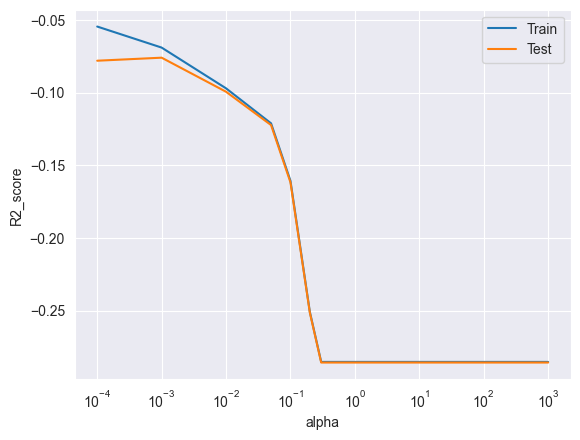

In [370]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### Comparing the two models

**The R2 score on test data is 0.93 for both Ridge Regression and Lasso models.**

In [371]:
pd.options.display.float_format = "{:,.2f}".format

lets see the changes in coefficients after regularization

In [372]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [373]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [374]:
betas

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.02   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.01   0.03
BsmtFinSF2             -0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.04
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.09   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr            0.00   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
Fireplaces              0.02   0.02
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.05  -0.05
MSSubClass_30          -0.04  -0.00
MSSubClass_40           0.01   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.03
MSSubClass_75           0.03   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.02
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.05  -0.04
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_FV             0.04   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.02  -0.04
Street_Pave            -0.01  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg            0.00  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.02  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.02  -0.00
LotConfig_FR3          -0.00  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.03   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.03   0.03
Neighborhood_ClearCr    0.03   0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Crawfor    0.08   0.09
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_MeadowV   -0.07  -0.03
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.03  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.01   0.00
Neighborhood_NridgHt    0.04   0.02
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.01   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Somerst    0.03   0.04
Neighborhood_StoneBr    0.05   0.01
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.00  -0.00
Condition1_Norm         0.04   0.04
Condition1_PosA         0.01   0.00
Condition1_PosN         0.02   0.00
Condition1_RRAe        -0.03  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.02   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.03   0.00
Condition2_PosA         0.03   0.00
Condition2_PosN        -0.03  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.03
BldgType_Twnhs         -0.04  -0.01
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.00   0.00
HouseStyle_1Story       0.02  -0.00
HouseStyle_2.5Fin       0.0

In [375]:
betas[betas['Lasso']==0].shape

(306, 2)

**The lasso has removed 306 features out of 384 so lasso also performs feature selection**

**The variables selected by lasso: **

In [376]:
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.04
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
MoSold                  -0.00
Age                     -0.05
MSSubClass_30           -0.00
MSSubClass_70            0.03
MSSubClass_90           -0.02
MSSubClass_160          -0.04
MSZoning_FV              0.00
MSZoning_RM             -0.04
LotShape_Reg            -0.00
LotConfig_CulDSac        0.02
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.09
Neighborhood_Edwards    -0.03
Neighborhood_MeadowV    -0.03
Neighborho

### Inferences

##### Top 10 features selected by ridge

In [377]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

##### To interpret the ridge coefficients in terms of target, we have to take inverse log of betas

In [378]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

##### Top 10 features selected by lasso

In [379]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso, dtype: float64

##### To interpret the lasso coefficients in terms of target, we have to take inverse log of betas

In [380]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

#### Top significant variables 

GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, TotalBsmtSF and Condition1_Norm

**Optimal value of lambda for Ridge Regression = 10**

**Optimal value of lambda for Lasso = 0.001**